In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('covtype.CSV',header=-1)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
headers=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'         
,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area_1','Wilderness_Area_2','Wilderness_Area_3','Wilderness_Area_4']

In [5]:
headers_init=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'         
,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Cover_Type']

In [6]:
soiltypes=[]
for i in range(1,41):
    soiltypes.append('Soil_Type_'+str(i))

soiltypes.append('Cover_Type')

In [7]:
for i in range(len(soiltypes)):
    headers.append(soiltypes[i])

In [8]:
data.columns=headers

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_1                     581012 non-null int64
Wilderness_Area_2                     581012 non-null int64
Wilderness_Area_3                     581012 non-null int64
Wilderness_Area_4                     581012 non-null int64
Soil_Type_1                           581012 non-

In [10]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [11]:
data['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data.Cover_Type)

In [14]:
train.shape

(406708, 55)

In [15]:
test.shape

(174304, 55)

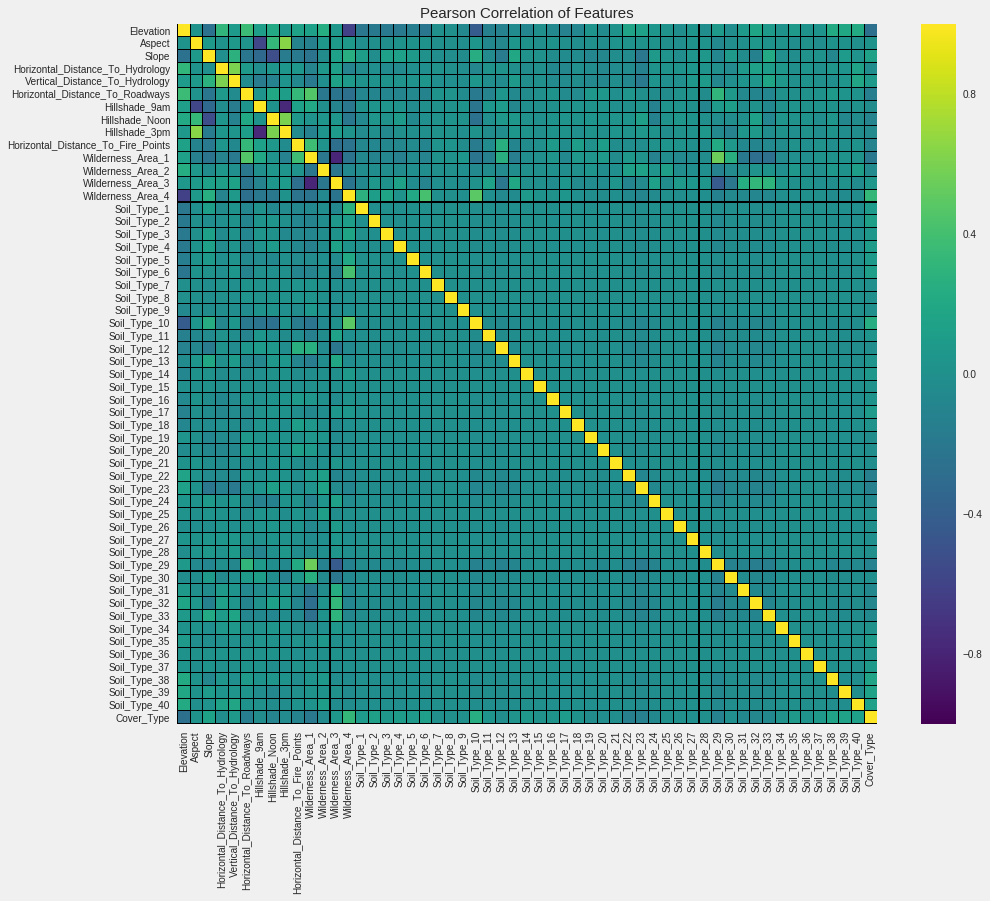

In [16]:
import matplotlib.style as style
style.use('fivethirtyeight')
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.0, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.05,vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=False)

In [17]:
for col_name in soiltypes:
    if train[col_name].dtype=='int64':
        unique_cat=len(train[col_name].unique())
        print("Feature:- {col_name} has {unique_cat} unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature:- Soil_Type_1 has 2 unique categories
Feature:- Soil_Type_2 has 2 unique categories
Feature:- Soil_Type_3 has 2 unique categories
Feature:- Soil_Type_4 has 2 unique categories
Feature:- Soil_Type_5 has 2 unique categories
Feature:- Soil_Type_6 has 2 unique categories
Feature:- Soil_Type_7 has 2 unique categories
Feature:- Soil_Type_8 has 2 unique categories
Feature:- Soil_Type_9 has 2 unique categories
Feature:- Soil_Type_10 has 2 unique categories
Feature:- Soil_Type_11 has 2 unique categories
Feature:- Soil_Type_12 has 2 unique categories
Feature:- Soil_Type_13 has 2 unique categories
Feature:- Soil_Type_14 has 2 unique categories
Feature:- Soil_Type_15 has 2 unique categories
Feature:- Soil_Type_16 has 2 unique categories
Feature:- Soil_Type_17 has 2 unique categories
Feature:- Soil_Type_18 has 2 unique categories
Feature:- Soil_Type_19 has 2 unique categories
Feature:- Soil_Type_20 has 2 unique categories
Feature:- Soil_Type_21 has 2 unique categories
Feature:- Soil_Type_22

In [18]:
#Remove Constant columns
train_cons = []
test_cons=[]
for col in train.columns:
    if train[col].std() == 0:
        train_cons.append(col)
        test_cons.append(col)

train=train.drop(train_cons,axis=1)
test=test.drop(test_cons,axis=1)

In [19]:
def feature_engineering(data2,train_cons):
    
    
    data = data2
    
    data['Ele_minus_VDtHyd'] = data.Elevation-data.Vertical_Distance_To_Hydrology
         
    data['Ele_plus_VDtHyd'] = data.Elevation+data.Vertical_Distance_To_Hydrology
     
    data['Distanse_to_Hydrology'] = (data['Horizontal_Distance_To_Hydrology']**2+data['Vertical_Distance_To_Hydrology']**2)**0.5
     
    data['Hydro_plus_Fire'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Fire_Points']
     
    data['Hydro_minus_Fire'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Fire_Points']
     
    data['Hydro_plus_Road'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways']
     
    data['Hydro_minus_Road'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Roadways']
     
    data['Fire_plus_Road'] = data['Horizontal_Distance_To_Fire_Points']+data['Horizontal_Distance_To_Roadways']
     
    data['Fire_minus_Road'] = data['Horizontal_Distance_To_Fire_Points']-data['Horizontal_Distance_To_Roadways']
    
    #data['Soil']=0
    #for i in range(1,41):
    #    if ('Soil_Type_'+str(i)) not in train_cons:
    #        data['Soil']=data['Soil']+i*data['Soil_Type_'+str(i)]
      
     
    #data['Wilderness_Area']=0
    #for i in range(1,5):
    #    data['Wilderness_Area']=data['Wilderness_Area']+i*data['Wilderness_Area_'+str(i)]
      
    return data

In [20]:
train_df = feature_engineering(train,train_cons)
test_df = feature_engineering(test,train_cons)

In [21]:
def get_features():
    return ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
    'Ele_minus_VDtHyd','Ele_plus_VDtHyd','Distanse_to_Hydrology','Hydro_plus_Fire','Hydro_minus_Fire','Hydro_plus_Road',
    'Hydro_minus_Road','Fire_plus_Road','Fire_minus_Road']

In [22]:
features_imp=get_features()
for i in range(1,41):
    features_imp.append('Soil_Type_'+str(i))
for j in range(1,5):
    features_imp.append('Wilderness_Area_'+str(j))

In [23]:
X_train=train_df[features_imp]
X_test=test_df[features_imp]

In [24]:
Y_train=train_df[['Cover_Type']]
Y_test=test_df[['Cover_Type']]

In [25]:
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4
15190,2736,4,15,60,17,3064,200,211,147,6249,...,0,0,0,0,0,0,1,0,0,0
560331,2600,195,33,256,115,1074,195,245,161,1050,...,0,0,0,0,0,0,0,0,1,0
323159,2922,123,13,192,48,1530,241,230,115,2078,...,0,0,0,0,0,0,0,0,1,0
349637,3111,291,8,446,45,2355,197,239,181,2491,...,0,0,0,0,0,0,0,0,1,0
137117,2760,18,5,330,9,1806,216,229,150,698,...,0,0,0,0,0,0,1,0,0,0


In [26]:
Y_train=Y_train-1
Y_test=Y_test-1

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
features_num=get_features()

In [29]:
X_train_num_Scld=StandardScaler().fit_transform(X_train[features_num])

In [30]:
len(features_num)

19

In [31]:
X_train.loc[:,:len(features_num)]=X_train_num_Scld

/home/namanda/anaconda3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406708 entries, 15190 to 269194
Data columns (total 63 columns):
Elevation                             406708 non-null float64
Aspect                                406708 non-null float64
Slope                                 406708 non-null float64
Horizontal_Distance_To_Hydrology      406708 non-null float64
Vertical_Distance_To_Hydrology        406708 non-null float64
Horizontal_Distance_To_Roadways       406708 non-null float64
Hillshade_9am                         406708 non-null float64
Hillshade_Noon                        406708 non-null float64
Hillshade_3pm                         406708 non-null float64
Horizontal_Distance_To_Fire_Points    406708 non-null float64
Ele_minus_VDtHyd                      406708 non-null float64
Ele_plus_VDtHyd                       406708 non-null float64
Distanse_to_Hydrology                 406708 non-null float64
Hydro_plus_Fire                       406708 non-null float64
Hydro_minus_Fire 

In [33]:
X_test_num_Scld=StandardScaler().fit_transform(X_test[features_num])

In [34]:
len(features_num)

19

In [35]:
X_test.loc[:,:len(features_num)]=X_test_num_Scld

/home/namanda/anaconda3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174304 entries, 3990 to 469778
Data columns (total 63 columns):
Elevation                             174304 non-null float64
Aspect                                174304 non-null float64
Slope                                 174304 non-null float64
Horizontal_Distance_To_Hydrology      174304 non-null float64
Vertical_Distance_To_Hydrology        174304 non-null float64
Horizontal_Distance_To_Roadways       174304 non-null float64
Hillshade_9am                         174304 non-null float64
Hillshade_Noon                        174304 non-null float64
Hillshade_3pm                         174304 non-null float64
Horizontal_Distance_To_Fire_Points    174304 non-null float64
Ele_minus_VDtHyd                      174304 non-null float64
Ele_plus_VDtHyd                       174304 non-null float64
Distanse_to_Hydrology                 174304 non-null float64
Hydro_plus_Fire                       174304 non-null float64
Hydro_minus_Fire  

/home/namanda/anaconda3.6/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


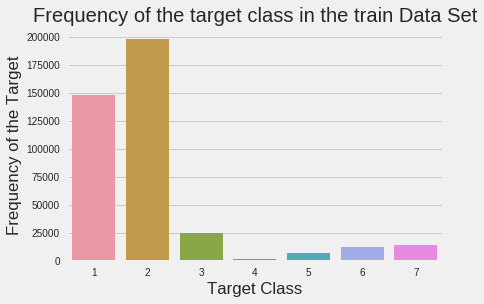

In [37]:
ax=sns.countplot(x='Cover_Type', data=train_df);
total=float(len(data))
plt.title('Frequency of the target class in the train Data Set')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')

/home/namanda/anaconda3.6/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


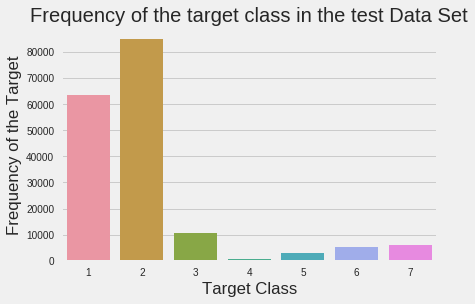

In [38]:
ax=sns.countplot(x='Cover_Type', data=test_df);
total=float(len(data))
plt.title('Frequency of the target class in the test Data Set')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')

# Without Noise

In [39]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.optimizers import SGD,Adam
import keras.backend as K
import keras.callbacks
from keras import regularizers

Using TensorFlow backend.


In [40]:
Y_train.shape

(406708, 1)

In [41]:
X_train_r,X_valid,Y_train_r,Y_valid=train_test_split(X_train,Y_train,test_size=0.1,random_state=0,stratify=Y_train.Cover_Type)

In [42]:
nb_classes=7
l1_num_neuron=500
l2_num_neuron=300
l3_num_neuron=200
l4_num_neuron=100
#l5_num_neuron=100
output_neuron=nb_classes

In [43]:
layer_1 = Dense(l1_num_neuron, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_dim=X_train.shape[1])
layer_2 = Dense(l2_num_neuron, activation='relu',kernel_regularizer=regularizers.l2(0.01))
layer_3 = Dense(l3_num_neuron, activation='relu',kernel_regularizer=regularizers.l2(0.01))
layer_4 = Dense(l4_num_neuron, activation='relu',kernel_regularizer=regularizers.l2(0.01))
layer_out = Dense(output_neuron, activation='softmax',kernel_regularizer=regularizers.l2(0.01))

In [44]:
mlp=Sequential()
mlp.add(layer_1)
mlp.add(Dropout(0.1))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
mlp.add(layer_2)
mlp.add(Dropout(0.3))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
mlp.add(layer_3)
mlp.add(Dropout(0.2))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
mlp.add(layer_4)
mlp.add(Dropout(0.2))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
#mlp.add(layer_5)
mlp.add(layer_out)

In [45]:
#optim=Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0005)
sgd = SGD(lr=0.01, momentum=0.8, decay=0.1/200, nesterov=True)
mlp.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [46]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               32000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dense_3 (Dense)              (None, 200)               60200     
__________

In [47]:
Y_train_r.shape

(366037, 1)

In [48]:
from keras.callbacks import EarlyStopping
train_res = mlp.fit(X_train_r.values,
                      Y_train_r.values.ravel(),
                      batch_size=300,
                      epochs=200,
                      verbose=True,
                      validation_data=(X_valid.values,
                                       Y_valid.values.ravel()),
                      callbacks=
                      [EarlyStopping(patience=4,mode='min',
                                     verbose=True)]
                      )

Train on 366037 samples, validate on 40671 samples
Epoch 1/200
366037/366037 [==============================] - 63s 171us/step - loss: 4.3360 - acc: 0.7251 - val_loss: 1.9048 - val_acc: 0.7546
Epoch 2/200
366037/366037 [==============================] - 59s 162us/step - loss: 1.2842 - acc: 0.7750 - val_loss: 0.8797 - val_acc: 0.8041
Epoch 3/200
366037/366037 [==============================] - 54s 147us/step - loss: 0.7662 - acc: 0.8027 - val_loss: 0.6453 - val_acc: 0.8215
Epoch 4/200
366037/366037 [==============================] - 55s 151us/step - loss: 0.6153 - acc: 0.8213 - val_loss: 0.5463 - val_acc: 0.8398
Epoch 5/200
366037/366037 [==============================] - 57s 156us/step - loss: 0.5519 - acc: 0.8335 - val_loss: 0.5037 - val_acc: 0.8482
Epoch 6/200
366037/366037 [==============================] - 59s 161us/step - loss: 0.5181 - acc: 0.8429 - val_loss: 0.4723 - val_acc: 0.8587
Epoch 7/200
366037/366037 [==============================] - 62s 168us/step - loss: 0.4979 - acc:

In [49]:
predictions=mlp.predict_classes(X_test.values,verbose=True)

174304/174304 [==============================] - 28s 160us/step


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.values.ravel(),predictions)

0.92921562327886909

# Pytorch Implementation for the Distilling tree

In [39]:
import torch
from torch.autograd import Variable

In [40]:
def build_model(inputut_dim,output_dim):
    model=torch.nn.Sequential()
    model.add_module('Linear_1',torch.nn.Linear(inputut_dim,500))
    model.add_module('relu_1',torch.nn.ReLU())
    model.add_module('dropout_1',torch.nn.Dropout(0.1))
    model.add_module('Batch_norm_1',torch.nn.BatchNorm1d(500))
    model.add_module('Linear_2',torch.nn.Linear(500,300))
    model.add_module('relu_2',torch.nn.ReLU())
    model.add_module('dropout_2',torch.nn.Dropout(0.3))
    model.add_module('Batch_norm_2',torch.nn.BatchNorm1d(300))
    model.add_module('Linear_3',torch.nn.Linear(300,200))
    model.add_module('relu_3',torch.nn.ReLU())
    model.add_module('dropout_3',torch.nn.Dropout(0.2))
    model.add_module('Batch_norm_3',torch.nn.BatchNorm1d(200))
    model.add_module('Linear_4',torch.nn.Linear(200,100))
    model.add_module('relu_4',torch.nn.ReLU())
    model.add_module('dropout_4',torch.nn.Dropout(0.2))
    model.add_module('Batch_norm_4',torch.nn.BatchNorm1d(100))
    model.add_module('Linear_5',torch.nn.Linear(100,output_dim))
    #model.add_module('softmax',torch.nn.Softmax())
    return model

In [41]:
def train(model, loss, optimizer, x_val, y_val):
    # Similar to placeholders in tensorflow
    x = Variable(x_val, requires_grad=False)
    y = Variable(y_val)

    # Reset gradient
    optimizer.zero_grad()

    # Forward
    fx = model.forward(x)
    output = loss.forward(fx, y)

    # Backward
    output.backward()

    # Update parameters
    optimizer.step()

    return output.data[0]

In [42]:
def predict(model, x_val):
    x = Variable(x_val, requires_grad=False)
    output = model.forward(x)
    return output.data.numpy().argmax(axis=1)

In [43]:
Y_train_onehot=pd.get_dummies(Y_train,columns=['Cover_Type'])

In [44]:
y_train=Y_train.values.ravel()

In [98]:
#torch.nn.MultiLabelSoftMarginLoss

(406708, 7)

In [104]:
torch.manual_seed(42)
from sklearn.metrics import accuracy_score
#trX, teX, trY, teY = load_mnist(onehot=False)
trX = torch.from_numpy(X_train.values).float()
teX = torch.from_numpy(X_test.values).float()
trY = torch.from_numpy(Y_train_onehot.values).float()

n_examples, n_features = trX.size()
n_classes = 7
model = build_model(n_features, n_classes)
loss = torch.nn.MultiLabelSoftMarginLoss()
optimizer = torch.optim.Adam(model.parameters(),weight_decay=0.01)
batch_size = 300

for i in range(20):
    cost = 0.
    num_batches = n_examples // batch_size
    for k in range(num_batches):
        start, end = k * batch_size, (k + 1) * batch_size
        cost += train(model, loss, optimizer, trX[start:end], trY[start:end])
    predY = predict(model, teX)
    print("Epoch %d, cost = %f, acc = %.2f%%"% (i + 1, cost / num_batches, 100. * accuracy_score(predY,Y_test.values)))


Epoch 1, cost = 0.171972, acc = 82.06%
Epoch 2, cost = 0.112228, acc = 84.66%
Epoch 3, cost = 0.100241, acc = 86.24%
Epoch 4, cost = 0.092987, acc = 87.13%
Epoch 5, cost = 0.088170, acc = 87.59%
Epoch 6, cost = 0.084658, acc = 88.30%
Epoch 7, cost = 0.081663, acc = 88.57%
Epoch 8, cost = 0.078981, acc = 88.74%
Epoch 9, cost = 0.077368, acc = 89.08%
Epoch 10, cost = 0.075273, acc = 89.25%


In [116]:
#style.available

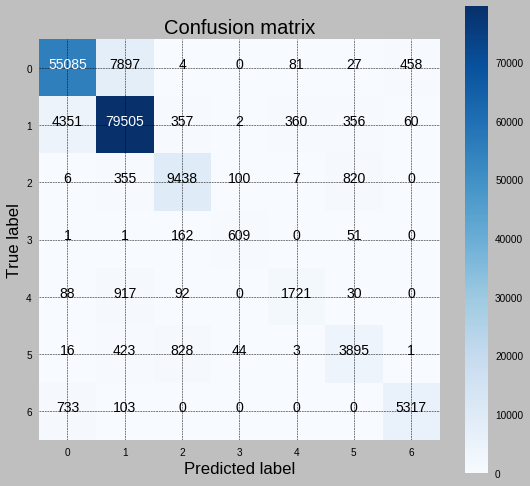

In [115]:
cnf_matrix = confusion_matrix(Y_test.values,predY)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
plt.style.use('grayscale')
# Plot non-normalized confusion matrix
class_names = [0,1,2,3,4,5,6]
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [45]:
import os
import time
import numpy as np
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [98]:
from collections import Counter

In [46]:
torch.manual_seed(1)

In [47]:
bz = 200
input_dim = X_train.shape[1]
no_classes = 7
max_depth = 2
epochs = 4 
lr = 0.01
lmbda = 0.1
momentum = 0.5
seed = 1
cuda = False
log_interval = 10

In [48]:
class LeafNode:
    def __init__(self, n_classes, input_dim):
        self.is_leaf = True
        self.n_classes = n_classes
        self.input_dim = input_dim
        self.fc = nn.Linear(input_dim, n_classes)
    
    
    def forward(self, x):
        """
        Calculates the probability distribution
        through the FC layer and softmax
        """
        self.Q = F.log_softmax(self.fc(x), dim =-1)
        self.store_idx
        return self.Q
    
    
    def get_leaf_preds(self):
        """
        returns the classes index tensor of batch passed
        """
        return [torch.max(self.Q,-1)[1]]   
    
    
    def store_idx(self):
        """
        distribution by class is stored for later
        """
        classes = {i:[] for i in range(self.n_classes)}    
        min_log_scores = self.get_leaf_preds()
        for idx, pred_class in enumerate(min_log_scores):
            classes[pred_class.data[0]].append(idx)
        self.class_dist = classes
        return classes

In [49]:
trX = torch.from_numpy(X_train.values).float()
teX = torch.from_numpy(X_test.values).float()
trY = torch.from_numpy(Y_train_onehot.values).float()

In [50]:
Y_test_onehot=pd.get_dummies(Y_test,columns=['Cover_Type'])
teY = torch.from_numpy(Y_test_onehot.values).double()

In [51]:
lnode = LeafNode(n_classes = 7, input_dim = X_train.shape[1])

In [52]:
lnode.forward(Variable(trX[:1]))

Variable containing:
-2.0939 -2.7148 -1.7068 -1.3612 -2.7442 -2.0773 -1.6971
[torch.FloatTensor of size 1x7]

In [53]:
trY[:1]


    0     1     0     0     0     0     0
[torch.FloatTensor of size 1x7]

In [54]:
lnode.store_idx()

{0: [], 1: [], 2: [], 3: [0], 4: [], 5: [], 6: []}

In [55]:
lnode.get_leaf_preds()

[Variable containing:
  3
 [torch.LongTensor of size 1]]

In [56]:

class prob_tree:
    """
    Recursive class,  Designed for tree calculations 
    up and down the different branches
    """
    def __init__(self, list_prob, node_prob=None, path_prob=None, lvl=1, max_depth=2):
        """
        Initializes the tree. Takes in a list of probabilities 
        corresponding to trees:
        
        listprob = [ root, l, r, ll, lr, rl, rr .....]
        lvl = assumes the current level (increases with recursion)
        max_depth = end condition
        path_prob = probability to REACH the current node, if 
            first node, the probability is 100%
        node_prob = the probability of the current node to the next split
        """
        
        # if there is no path prob, then 100%
        # must be passed 
        if path_prob is None:
            self.path_prob = Variable(torch.ones(list_prob[0].shape))
        else:
            self.path_prob = path_prob
            
        # this is the probability within the current node
        # if node probability isn't passed, pull from list
        if node_prob is None:
            self.prob = list_prob.pop(0)
        else:
            self.prob = node_prob
        
        self.lvl = lvl
        self.max_depth = max_depth
        
        
        # since we are doing breath first searching
        # will pass the node probabilities forward
        if lvl < max_depth:
            left_node_prob = list_prob.pop(0)
            right_node_prob = list_prob.pop(0)
            
            self.left = prob_tree(list_prob, left_node_prob, self.path_prob*self.prob, self.lvl+1, self.max_depth)
            self.right = prob_tree(list_prob, right_node_prob, self.path_prob*(1-self.prob), self.lvl+1, self.max_depth)
        else:
            self.left = None
            self.right = None
            
    def get_leaf_path_probs(self):
        """
        returns a list of path probabilities for only the leaf (recursive)
        """
        if self.left is None:
            return([self.path_prob*self.prob, self.path_prob*(1-self.prob) ])
        else:
            return(self.left.get_leaf_path_probs() + self.right.get_leaf_path_probs())
            
    def get_inner_path_probs(self):
        """
        returns a list of path probabilities for only the inner nodes (recursive)
        uses breath first algorithm
        """        
        path_probs = []
        nodes = [self]
        while nodes:
            current = nodes.pop(0)
            path_probs.append((self.lvl-1,current.path_prob))
            if current.left:
                nodes.append(current.left)
                nodes.append(current.right)
        return(path_probs)

In [57]:
class NTree3(nn.Module):
    def __init__(self, tree_depth=3, n_classes=7, ni=X_train.shape[1], lmbda = 0.1, on_cuda=False, leaf_type ='const'):
        super(NTree3,self).__init__()
        self.n_leaves = 2**tree_depth
        self.n_classes = n_classes
        self.n_nodes = self.n_leaves -1
        self.tree_depth = tree_depth
        self.on_cuda = on_cuda
        self.leaf_type = leaf_type
        self.ptree = None
        
        # regularization
        self.lmbda = lmbda


        leaf_params = [torch.randn(self.n_classes) for i in range(self.n_leaves)]
        beta_params = [torch.rand(1) for i in range(self.n_nodes)]
                
        if self.on_cuda==True:
            beta_params = [beta_param.cuda() for beta_param in beta_params]
            leaf_params = [leaf_param.cuda() for leaf_param in leaf_params]
        
        self.nodes =  nn.ModuleList([nn.Linear(ni, 1) for i in range(self.n_nodes)])
        
        if self.leaf_type == 'const':
            self.leaves = nn.ParameterList([nn.Parameter(leaf_param) for leaf_param in leaf_params])
        elif self.leaf_type == 'logreg':
            self.leaves = nn.ModuleList([nn.Linear(ni, n_classes) for i in range(self.n_leaves)])
                        
        # inverse temperature filter
        self.betas = nn.ParameterList([nn.Parameter(beta) for beta in beta_params])
        
        
    def forward(self, x):
        bz = x.size()[0]
        sigmoid = nn.Sigmoid()
        
        # if we assume constant distribution in the leaft nodes
        if self.leaf_type == 'const': 
            softmax = nn.Softmax(dim=0)
        else: 
            softmax = nn.Softmax(dim=-1)
        
        
        # create distributions at each leaf - store for later
        if self.leaf_type == 'const':
            leaf_pcts = [softmax(leaf_param) for leaf_param in self.leaves]
            leaf_dist = [pct.expand(bz, self.n_classes) for pct in leaf_pcts]
            self.leaf_pcts = leaf_pcts
        else:
            leaf_dist = [softmax(leaf(x)) for leaf in self.leaves]
        
        
        # probabilities of inner nodes
        tmp = [self.nodes[i](x) for i in range(self.n_nodes)]
        
        p_x = [sigmoid(self.betas[i]*self.nodes[i](x)) for i in range(self.n_nodes)]
        
        tmp = [x for x in p_x]
        pt = prob_tree(tmp, max_depth=self.tree_depth)
        
        path_prob = pt.get_leaf_path_probs()
        
        return leaf_dist, path_prob, p_x

In [99]:
def split_idx(batch_prob, master_tensor):
    EMPTY_TENSOR = torch.zeros(1).nonzero()
    local_prob = batch_prob.index_select(dim=0, index=Variable(master_tensor[:,0].long()))
    left_mask = local_prob > 0.5
    right_mask = local_prob <= 0.5
    
    l = left_mask.nonzero()
    r = right_mask.nonzero()
    
    if len(l)>0:    
        left_mask_idx = l[:,0].data    
        left_idx = master_tensor.index_select(dim=0,index=left_mask_idx)
    else:
        left_idx = EMPTY_TENSOR
        
    if len(r)>0:
        right_mask_idx = r[:,0].data
        right_idx = master_tensor.index_select(dim=0,index=right_mask_idx)
    else:
        right_idx = EMPTY_TENSOR
    return(left_idx, right_idx)


def distribute_points(labels_var, p_x, max_depth):
    EMPTY_TENSOR = torch.zeros(1).nonzero()
    master_list = [(i,v) for i, v in enumerate(labels_var.data)]
    master_tensor = torch.Tensor(master_list)

    output = [master_tensor]
    idx_queue = [master_tensor]
    tmp = [a for a in p_x]
    
    iter_limit = 2**(max_depth)
    counter = 1
    while counter < iter_limit:
        counter +=1
        current_prob = tmp.pop(0)
        current_labels = idx_queue.pop(0)

        left_labels, right_labels = split_idx(current_prob, current_labels)
        if len(left_labels) > 0:
            output.append(left_labels)
            idx_queue.append(left_labels)
        else:
            output.append(EMPTY_TENSOR)

        if len(right_labels) > 0 :
            output.append(right_labels)
            idx_queue.append(right_labels)
        else:
            output.append(EMPTY_TENSOR)
    return(output)

def add_index(tensor, offset):
    tensor[:,0] = tensor[:,0] + offset
    return(tensor)

def spread_test_distr(bz, model, test_loader):
    max_depth = model.tree_depth
    test_loader = iter(test_loader)
    master_points_dist = {i:[] for i in range(2**(max_depth+1)-1)}
    
    for i, batch in enumerate(test_loader):
        img_data, labels = batch
        img_data_var, labels_var = Variable(img_data), Variable(labels)
        leaf_dist, path_prob, p_x = model(img_data_var)
        
        # initialize
        val,labels_var=torch.max(labels_var,1)
        points_dist = distribute_points(labels_var, p_x, max_depth)
        for i, tensor in enumerate(points_dist):
            master_points_dist[i].append(tensor)
            
            
    
    for k, v in master_points_dist.items():
        master_points_dist[k] = torch.cat([add_index(tensor, j*bz) for j, tensor in enumerate(v) if len(tensor) > 0],dim=0)

    return master_points_dist

def plot_test_tree_spread(bz, model, test_loader):
    max_depth = model.tree_depth
    res = spread_test_distr(bz, model, test_loader)
    tmp = [a for a in res.values()]


    for i in range(0,max_depth+1):
        fig, ax_array = plt.subplots(1, 2**i, sharey=True)
        fig.set_size_inches(14,4)
        for j in range(2**i):
            tensor = tmp.pop(0)
            ctr = dict(Counter(tensor[:,1]))
            x = list(ctr.keys())
            y = list(ctr.values())
            if i == 0:
                ax_array.bar(x, height=y)
            else:
                ax_array[j].bar(x, height=y)

In [96]:
def bigot_leaf_loss(path_prob, leaf_dist, labels, on_cuda):
    ymask = torch.FloatTensor(leaf_dist.size()).zero_()
    if on_cuda:
        ymask = ymask.cuda()
    val,labels_flat=torch.max(labels,1)
    ymask.scatter_(1, labels_flat.data.view(-1,1), 1)
    ymask = Variable(ymask)
    Tk_log_Qk = (torch.log(leaf_dist) * ymask).sum(1)
    PTQ = Tk_log_Qk[:,None]*path_prob
    return torch.sum(PTQ)


def penalty(p_x, max_depth, lmbda=0.1):
    
    tmp = [x for x in p_x]
    ptree = prob_tree(tmp, max_depth=max_depth)
    P_x = ptree.get_inner_path_probs()
    
    alphas = [(Px[0], torch.sum(torch.mul(Px[1],px))/torch.sum(Px[1])) for px, Px in zip(p_x, P_x)]
    
    def c1(alpha_i):
        return 0.5*np.log(alpha_i) + 0.5*np.log(1-alpha_i)

    C =  np.sum([-lmbda*2**-depth*c1(alp) for depth, alp in alphas])
    return C

def total_loss(path_probs, leaf_dists, p_x, labels, max_depth, lmbda=0.1,  on_cuda=False):
    L_x = [bigot_leaf_loss(path_prob, leaf_dist, labels, on_cuda) for path_prob, leaf_dist in zip(path_probs, leaf_dists)]
    C = penalty(p_x, max_depth, lmbda)
    return(torch.log(-torch.sum(torch.stack(L_x)))+C)


def which_node(path_prob, n_leaves, on_cuda=False):
    node_id = torch.max(torch.stack(path_prob),dim=0)[1]    
    nodes_onehot = torch.FloatTensor(path_prob[0].size()[0], n_leaves).zero_()
    if on_cuda:
        node_id = node_id.cuda()
        nodes_onehot = nodes_onehot.cuda()
    node_mask = nodes_onehot.scatter_(1, node_id.data,1)
    return(node_id,node_mask)


def which_class(path_prob, leaf_dist, on_cuda=False):
    n_leaves = len(leaf_dist)
    node_id, node_mask = which_node(path_prob, n_leaves, on_cuda)
    max_class_per_node = torch.t(torch.max(torch.stack(leaf_dist),dim=2)[1])
    pred_class = torch.sum(Variable(node_mask.long())*max_class_per_node,dim=1)
    return(pred_class)


def acc_calc(val_dl, model, on_cuda=False):
    model.eval()
    val_ = iter(val_dl)
    correct = 0
    total = 0
    final_dist = 0

    for i, batch in enumerate(val_dl):
        data, labels = batch
        #print(data)
        #print(labels)
        val,labels_flat=torch.max(labels,1)
        if on_cuda:
                data, labels = data.cuda(), labels.cuda()
        data_var, labels_var = Variable(data), Variable(labels)        
        leaf_dist, path_prob, p_nodes = model(data_var)
        final_dist += which_node(path_prob, n_leaves = model.n_leaves, on_cuda=on_cuda)[1].sum(0)
        
        preds = which_class(path_prob, leaf_dist, on_cuda=on_cuda)
        #print(preds)
        match = labels_flat.eq(preds.data)
        correct += match.sum()
        total += match.size()[0]
    return(correct/total, correct, total, final_dist) 

def plt_node_dist(leaf_pcts):
    """
    .store_preds() must be run by calling .predict()
    """
    n_leaves = len(leaf_pcts)
    n_half = int(n_leaves/2) 
    fig, ax_array = plt.subplots(2, n_half, sharey=True)
    fig.set_figwidth(12)
    plt.setp(ax_array, xticks=[0,1,2,3,4,5,6])
    plt.subplots_adjust(hspace=0.5)
    for i, leaf_pct in enumerate(leaf_pcts):
        pct_dict = {k:v for k,v in enumerate(leaf_pct.data.numpy())}
        x = list(pct_dict.keys())
        y = list(pct_dict.values())
        if i < n_half:
            ax_array[0,i].bar(x, height=y)
            ax_array[0,i].set_title('Node %d' % i)
        else:
            ax_array[1,i-n_half].bar(x, height=y)
            ax_array[1,i-n_half].set_title('Node %d' % i)

In [62]:
train_dl,y = iter(train_loader).next()

In [76]:
train_dl

In [84]:
val,ix=torch.max(y,1)

In [92]:
is_cuda = False
lmbda = 0.1
max_depth = 2
kwargs = {'num_workers': 1, 'pin_memory': True}

tr_ds=torch.utils.data.TensorDataset(trX,trY)
ts_ds=torch.utils.data.TensorDataset(teX,teY)
batch_size=200
# flattened
if is_cuda:
    train_loader = torch.utils.data.DataLoader(tr_ds, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(ts_ds, batch_size=batch_size, shuffle=False, **kwargs)
else:
    train_loader = torch.utils.data.DataLoader(tr_ds, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(ts_ds, batch_size=batch_size, shuffle=False)

    
model = NTree3(tree_depth=max_depth, n_classes=7, ni=X_train.shape[1], lmbda = lmbda, on_cuda=is_cuda, leaf_type='logreg')

if is_cuda:
    model.cuda()
    
n_epochs = 5
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_dl = iter(train_loader)
final_dist = 0

for epoch in range(n_epochs):
    running_loss = 0.0
    train_dl = iter(train_loader)
    
    for i, batch in enumerate(train_dl):
        data, labels = batch
        bz = data.size()[0]
        if is_cuda:
            data = data.cuda()
            labels = labels.cuda()
        data_var, labels_var = Variable(data), Variable(labels)
       
            
        optimizer.zero_grad()
        leaf_dist, path_prob, p_x = model(data_var)
        
        loss = total_loss(path_prob, leaf_dist, p_x, labels_var, max_depth, lmbda, is_cuda)
        loss.backward()
        optimizer.step()
        
        if i%200 == 0:
            acc, correct, total, dist = acc_calc(test_loader, model, on_cuda=is_cuda)
            print('Ep: %d , %05d,  L: %.03f, A: %.04f, dist %s' % (epoch, i*bz ,loss.data[0], acc, list(dist.long().cpu().numpy())))

Ep: 0 , 00000,  L: 6.197, A: 0.1444, dist [42759, 72138, 29562, 29845]
Ep: 0 , 40000,  L: 5.598, A: 0.6764, dist [46058, 35855, 61055, 31336]
Ep: 0 , 80000,  L: 5.334, A: 0.6927, dist [44080, 38938, 50696, 40590]
Ep: 0 , 120000,  L: 5.195, A: 0.7034, dist [43040, 39550, 46700, 45014]
Ep: 0 , 160000,  L: 5.095, A: 0.7118, dist [43662, 39642, 45378, 45622]
Ep: 0 , 200000,  L: 4.997, A: 0.7178, dist [43200, 39751, 45215, 46138]
Ep: 0 , 240000,  L: 5.012, A: 0.7223, dist [42718, 40746, 44822, 46018]
Ep: 0 , 280000,  L: 5.172, A: 0.7267, dist [43322, 40202, 45194, 45586]
Ep: 0 , 320000,  L: 5.007, A: 0.7283, dist [42755, 41448, 44738, 45363]
Ep: 0 , 360000,  L: 5.126, A: 0.7306, dist [42984, 41592, 44035, 45693]
Ep: 0 , 400000,  L: 5.135, A: 0.7332, dist [43332, 41152, 43987, 45833]
Ep: 1 , 00000,  L: 5.046, A: 0.7341, dist [43482, 41020, 44126, 45676]
Ep: 1 , 40000,  L: 4.991, A: 0.7357, dist [43419, 41135, 43895, 45855]
Ep: 1 , 80000,  L: 4.901, A: 0.7356, dist [43320, 41609, 43641, 45734

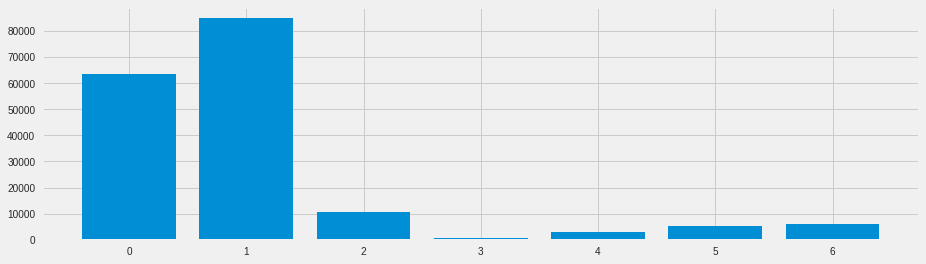

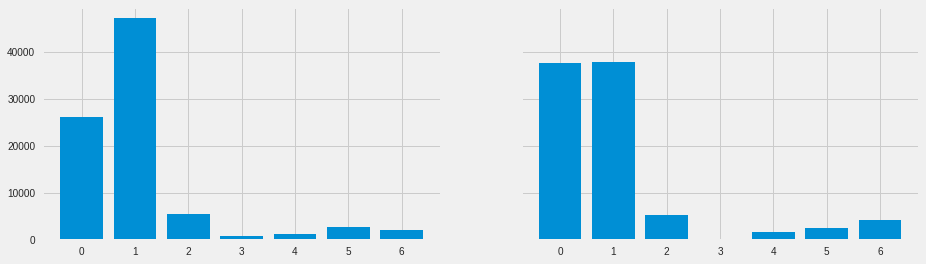

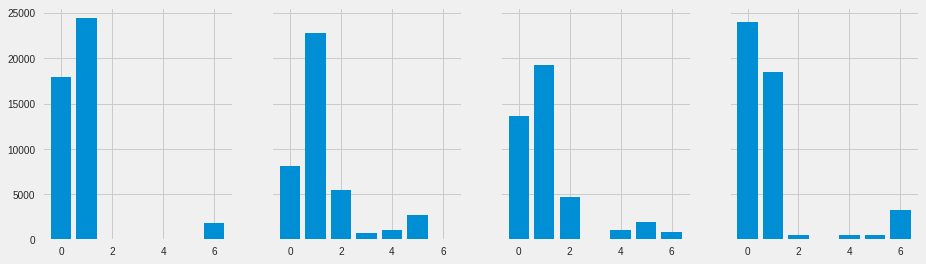

In [100]:
plot_test_tree_spread(bz, model, test_loader)

# Noise conisderation

In [101]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.optimizers import SGD,Adam
import keras.backend as K
import keras.callbacks
from keras import regularizers

Using TensorFlow backend.
/home/namanda/anaconda3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [163]:
plt.style.use('ggplot')

In [ ]:
NOISE_LEVEL=0.3  # what part of training labels are permuted
#perm = np.array([6, 0, 4, 2, 1, 3, 5])  # noise permutation (from Reed)

In [99]:
Y_train=train_df['Cover_Type']-1

In [100]:
Y_test=test_df['Cover_Type']-1

In [101]:
#noise = perm[Y_train]

In [102]:
seed=0
nb_classes = 7

In [103]:
#X_train=X_train_red_rf_features

In [104]:
n_train_data,dim=X_train.shape
n_test_data,dim_test=X_test.shape
Y_train=Y_train.values.reshape(n_train_data,1)
Y_test=Y_test.values.reshape(n_test_data,1)

In [105]:
nhiddens = [500,300,200,100]
DROPOUT=0.3
#opt='adam'
batch_size = 300
patience = 4  # Early stopping patience
epochs = 400  # number of epochs to train on

In [106]:
def castLabel(y, t):
    if -1 in y:
        if t == -1:
            y_new = y
        elif t == 0:
            y_new = np.divide((y + 1) ,2)
        elif t == 2:
            y_new = np.divide((y + 3),2)
    elif 0 in y:
        if (t == -1):
            y_new = (y * 2) - 1
        elif (t == 0):
            y_new = y
        elif (t == 2):
            y_new = y + 1
    elif 2 in y:
        if (t == -1):
            y_new = (y * 2) - 3
        elif (t == 0):
            y_new = y - 1
        elif (t == 2):
            y_new = y
    return y_new

In [107]:
def injectLabelNoise(y,flipRate):
    fd  =  -np.ones((y.shape))
    yz  =  castLabel(y,-1)
    y   =  castLabel(y,2)
    # sampling some numbers
    for i in range(0,2):
        prob    = np.random.rand(y.shape[0],1)
        idx     = np.where((y==i+1) & (prob <= flipRate[i]))
        #print(idx)
        yz[idx[0]] = -yz[idx[0]]
        fd[idx[0]] = -fd[idx[0]]
    yz = castLabel(yz,2)
    return yz, fd

In [108]:
yz, fd=injectLabelNoise(Y_train, [0.2,0.2,0.2,0.3,0.2,0.05,0.05])
yz=castLabel(yz,0)

In [109]:
NOISE= round(1. - np.mean(yz == Y_train),2)

In [110]:
NOISE

0.17000000000000001

In [111]:
Y_train_noise=yz

In [112]:
Y_train_noise=Y_train_noise.flatten()

Text(0.5,0,'Target Class')

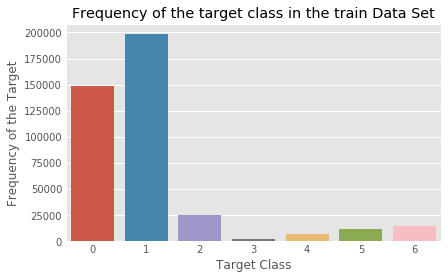

In [113]:
Y_train_df=pd.DataFrame(Y_train,columns=['Cover_Type'])
ax=sns.countplot(x='Cover_Type', data=Y_train_df);
total=float(len(data))
plt.title('Frequency of the target class in the train Data Set')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')

Text(0.5,0,'Target Class')

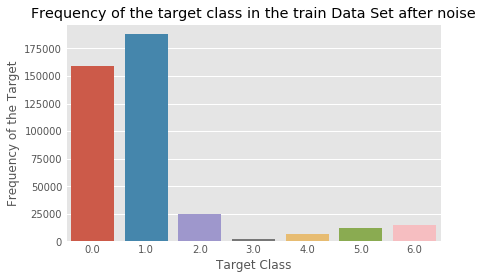

In [114]:
Y_train_df_noise=pd.DataFrame(Y_train_noise,columns=['Cover_Type'])
ax=sns.countplot(x='Cover_Type', data=Y_train_df_noise);
total=float(len(data))
plt.title('Frequency of the target class in the train Data Set after noise')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')

In [115]:
from sklearn.model_selection import StratifiedShuffleSplit
#_, noise_idx = next(iter(StratifiedShuffleSplit(n_splits=1,
#                                                test_size=NOISE_LEVEL,
#                                                random_state=seed).split(X_train,Y_train.ravel())))
#Y_train_noise = Y_train.copy()
#noise=noise.reshape(n_train_data,1)
#Y_train_noise[noise_idx] = noise[noise_idx]

In [116]:
#1. - np.mean(Y_train_noise == Y_train)

In [118]:
# break the training set to 10% validation which we will use for early stopping.
train_idx, val_idx = next(iter(
        StratifiedShuffleSplit(n_splits=1, test_size=0.1,
                               random_state=0).split(X_train, Y_train_noise))) #.values
#X_train=X_train.values
X_train_train = X_train[train_idx]
Y_train_train = Y_train_noise[train_idx]
X_train_val = X_train[val_idx]
Y_train_val = Y_train_noise[val_idx]

In [119]:
from keras import regularizers
from keras.models import Sequential
hidden_layers = Sequential(name='hidden')

In [120]:
from keras.layers import Dense, Dropout, Activation
for i, nhidden in enumerate(nhiddens):
    hidden_layers.add(Dense(nhidden,kernel_regularizer=regularizers.l2(0.01),
                            input_shape=(X_train.shape[1],) if i == 0 else []))
    hidden_layers.add(Activation('relu'))
    hidden_layers.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
    hidden_layers.add(Dropout(DROPOUT))

In [121]:
from keras.layers import Input
train_inputs = Input(shape=(X_train.shape[1],))

In [122]:
last_hidden = hidden_layers(train_inputs)
baseline_output = Dense(nb_classes, activation='softmax', name='baseline',kernel_regularizer=regularizers.l2(0.01))(last_hidden)

In [123]:
from keras.models import Model
sgd = SGD(lr=0.01, momentum=0.8, decay=0.1/200, nesterov=True)
model = Model(inputs=train_inputs, outputs=baseline_output)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [124]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 63)                0         
_________________________________________________________________
hidden (Sequential)          (None, 100)               267000    
_________________________________________________________________
baseline (Dense)             (None, 7)                 707       
Total params: 267,707
Trainable params: 265,507
Non-trainable params: 2,200
_________________________________________________________________


In [125]:
def eval(model,y_test=Y_test):
    return dict(zip(model.metrics_names,model.evaluate(X_test.values,y_test, verbose=False)))

In [126]:
eval(model)

{'acc': 0.23168143014503395, 'loss': 10.61220871025605}

In [127]:
from keras.callbacks import EarlyStopping
train_res = model.fit(X_train_train,
                      Y_train_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=True,
                      validation_data=(X_train_val,
                                       Y_train_val),
                      callbacks=
                      [EarlyStopping(patience=patience,mode='min',
                                     verbose=True)]
                      )

Train on 366037 samples, validate on 40671 samples
Epoch 1/400
366037/366037 [==============================] - 60s 164us/step - loss: 4.5092 - acc: 0.6089 - val_loss: 2.0664 - val_acc: 0.6402
Epoch 2/400
366037/366037 [==============================] - 62s 169us/step - loss: 1.4823 - acc: 0.6447 - val_loss: 1.0997 - val_acc: 0.6593
Epoch 3/400
366037/366037 [==============================] - 58s 157us/step - loss: 0.9860 - acc: 0.6560 - val_loss: 0.8639 - val_acc: 0.6728
Epoch 4/400
366037/366037 [==============================] - 58s 160us/step - loss: 0.8440 - acc: 0.6668 - val_loss: 0.7847 - val_acc: 0.6840
Epoch 5/400
366037/366037 [==============================] - 58s 159us/step - loss: 0.7889 - acc: 0.6764 - val_loss: 0.7456 - val_acc: 0.6927
Epoch 6/400
366037/366037 [==============================] - 57s 155us/step - loss: 0.7614 - acc: 0.6821 - val_loss: 0.7288 - val_acc: 0.6991
Epoch 7/400
366037/366037 [==============================] - 59s 162us/step - loss: 0.7447 - acc:

In [128]:
eval(model)

{'acc': 0.88170667339820086, 'loss': 0.48480561193422766}

In [129]:
ybaseline_predict = model.predict(X_train,batch_size=batch_size)

In [130]:
ybaseline_predict = np.argmax(ybaseline_predict, axis=-1)

In [131]:
ybaseline_predict=ybaseline_predict.reshape(ybaseline_predict.shape[0],1)

In [132]:
Y_train_noise=Y_train_noise.flatten()

In [133]:
Y_train_noise=pd.DataFrame(Y_train_noise,columns=['Cover_Type'])

In [134]:
Y_train_noise=Y_train_noise.astype('int')

In [135]:
Y_train_noise.head()

,Cover_Type
0,1
1,1
2,1
3,0
4,0


In [136]:
baseline_confusion = np.zeros((nb_classes, nb_classes))
for n, p in zip(Y_train_noise.values.ravel(), ybaseline_predict):
    baseline_confusion[p, n] += 1.

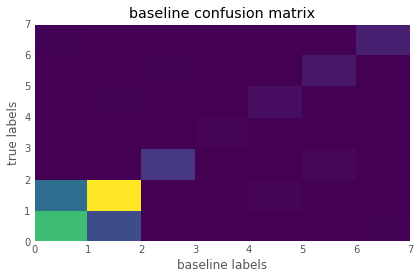

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
# perm_bias_weights.astype(int)
plt.pcolor(baseline_confusion)
plt.ylabel('true labels')
plt.xlabel('baseline labels')
plt.title('baseline confusion matrix');

In [138]:
BETA = 0

In [145]:
#baseline_confusion

In [146]:
channel_weights = baseline_confusion.copy()
#channel_weights=channel_weights + 1e-8
channel_weights /= channel_weights.sum(axis=1, keepdims=True)
# perm_bias_weights[prediction,noisy_label] = log(P(noisy_label|prediction))
channel_weights = np.log(channel_weights+1e-8)

In [147]:
from channel import Channel
channeled_output = Channel(name='channel',weights=[channel_weights],kernel_regularizer=regularizers.l2(0.01))(baseline_output)

In [148]:
if BETA ==1:
    simple_model = Model(inputs=train_inputs, outputs=[baseline_output])
    simple_model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
else:
    simple_model = Model(inputs=train_inputs, outputs=[channeled_output, baseline_output])
    simple_model.compile(loss='sparse_categorical_crossentropy',loss_weights=[1.-BETA, BETA],optimizer=sgd,metrics=['accuracy'])

In [149]:
simple_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 63)                0         
_________________________________________________________________
hidden (Sequential)          (None, 100)               267000    
_________________________________________________________________
baseline (Dense)             (None, 7)                 707       
_________________________________________________________________
channel (Channel)            (None, 7)                 49        
Total params: 267,756
Trainable params: 265,556
Non-trainable params: 2,200
_________________________________________________________________


In [150]:
train_res = simple_model.fit(X_train_train,
                      [Y_train_train,Y_train_train],
                      batch_size=batch_size,
                      epochs=100,
                      verbose=True,
                      validation_data=(X_train_val,
                                       [Y_train_val,Y_train_val]),
                      callbacks=
                      [EarlyStopping(patience=3,mode='min',verbose=True)]
                      )

Train on 366037 samples, validate on 40671 samples
Epoch 1/100
366037/366037 [==============================] - 57s 156us/step - loss: 48.5608 - channel_loss: 0.6845 - baseline_loss: 0.9806 - channel_acc: 0.7037 - baseline_acc: 0.7031 - val_loss: 47.4374 - val_channel_loss: 0.6427 - val_baseline_loss: 0.8902 - val_channel_acc: 0.7281 - val_baseline_acc: 0.7272
Epoch 2/100
366037/366037 [==============================] - 58s 158us/step - loss: 46.4165 - channel_loss: 0.6603 - baseline_loss: 0.8897 - channel_acc: 0.7138 - baseline_acc: 0.7135 - val_loss: 45.3650 - val_channel_loss: 0.6305 - val_baseline_loss: 0.8468 - val_channel_acc: 0.7313 - val_baseline_acc: 0.7309
Epoch 3/100
366037/366037 [==============================] - 55s 150us/step - loss: 44.4038 - channel_loss: 0.6512 - baseline_loss: 0.8562 - channel_acc: 0.7173 - baseline_acc: 0.7173 - val_loss: 43.4092 - val_channel_loss: 0.6229 - val_baseline_loss: 0.8249 - val_channel_acc: 0.7352 - val_baseline_acc: 0.7353
Epoch 4/100
3

366037/366037 [==============================] - 60s 163us/step - loss: 17.6852 - channel_loss: 0.6639 - baseline_loss: 0.7803 - channel_acc: 0.7322 - baseline_acc: 0.7325 - val_loss: 17.3698 - val_channel_loss: 0.6435 - val_baseline_loss: 0.7566 - val_channel_acc: 0.7481 - val_baseline_acc: 0.7481
Epoch 28/100
366037/366037 [==============================] - 68s 186us/step - loss: 17.1066 - channel_loss: 0.6657 - baseline_loss: 0.7791 - channel_acc: 0.7321 - baseline_acc: 0.7324 - val_loss: 16.8034 - val_channel_loss: 0.6450 - val_baseline_loss: 0.7546 - val_channel_acc: 0.7488 - val_baseline_acc: 0.7487
Epoch 29/100
366037/366037 [==============================] - 58s 157us/step - loss: 16.5527 - channel_loss: 0.6673 - baseline_loss: 0.7756 - channel_acc: 0.7325 - baseline_acc: 0.7328 - val_loss: 16.2620 - val_channel_loss: 0.6469 - val_baseline_loss: 0.7553 - val_channel_acc: 0.7486 - val_baseline_acc: 0.7486
Epoch 30/100
366037/366037 [==============================] - 53s 144us/st

366037/366037 [==============================] - 60s 163us/step - loss: 4.6820 - channel_loss: 0.7423 - baseline_loss: 0.7254 - channel_acc: 0.7350 - baseline_acc: 0.7361 - val_loss: 4.6203 - val_channel_loss: 0.7251 - val_baseline_loss: 0.7013 - val_channel_acc: 0.7519 - val_baseline_acc: 0.7525
Epoch 80/100
366037/366037 [==============================] - 59s 160us/step - loss: 4.5946 - channel_loss: 0.7430 - baseline_loss: 0.7242 - channel_acc: 0.7357 - baseline_acc: 0.7370 - val_loss: 4.5342 - val_channel_loss: 0.7259 - val_baseline_loss: 0.7051 - val_channel_acc: 0.7506 - val_baseline_acc: 0.7510
Epoch 81/100
366037/366037 [==============================] - 55s 151us/step - loss: 4.5100 - channel_loss: 0.7439 - baseline_loss: 0.7215 - channel_acc: 0.7351 - baseline_acc: 0.7363 - val_loss: 4.4512 - val_channel_loss: 0.7269 - val_baseline_loss: 0.7004 - val_channel_acc: 0.7514 - val_baseline_acc: 0.7511
Epoch 82/100
366037/366037 [==============================] - 54s 146us/step - l

In [151]:
eval(simple_model,y_test=[Y_test,Y_test])

{'baseline_acc': 0.89088603818615753,
 'baseline_loss': 0.30477197349416196,
 'channel_acc': 0.88921080411235542,
 'channel_loss': 0.5840167819370321,
 'loss': 3.0967835600012394}

In [106]:
X_test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4
164839,1.062205,-1.015218,-0.281233,1.419812,1.075216,2.376722,0.367996,-0.521273,-0.483519,0.046222,...,0,0,0,0,0,0,1,0,0,0
109171,-0.904660,-1.345844,1.053780,-0.952268,-0.658978,-0.727730,-0.938038,-1.583439,-0.144115,0.141404,...,0,0,0,0,0,0,1,0,0,0
448439,0.762356,1.147259,-0.815238,-1.126409,-0.882192,0.322475,-0.527570,0.844368,1.004636,-0.539226,...,0,0,0,0,0,0,0,0,1,0
566791,-2.036231,0.146444,0.119271,-0.683997,-0.178212,-1.470182,0.629202,1.147844,0.064749,-1.312773,...,0,0,0,0,0,0,0,0,1,0
495355,0.362558,1.504693,0.653276,-0.363955,0.113683,-1.145760,-1.609712,-0.369535,1.135176,-0.181158,...,0,0,0,0,0,0,0,0,1,0


In [152]:
preds=simple_model.predict(X_test.values)

In [153]:
preds_max=np.argmax(preds[0],axis=-1)

In [154]:
preds_max.shape

(174304,)

In [105]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [106]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [157]:
Y_test_df=pd.DataFrame(Y_test,columns=['Cover_Type'])

In [158]:
Y_test_df['Cover_Type'].value_counts()

1    84991
0    63552
2    10726
6     6153
5     5210
4     2848
3      824
Name: Cover_Type, dtype: int64

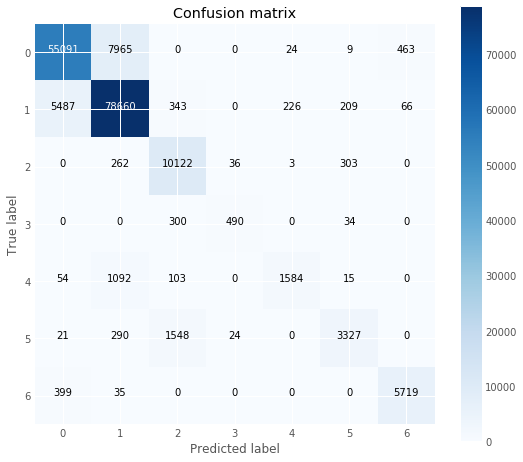

In [159]:
cnf_matrix = confusion_matrix(Y_test,preds_max)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1,2,3,4,5,6]
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [160]:
from sklearn.metrics import accuracy_score

In [161]:
accuracy_score(Y_test,preds_max.ravel())

0.88921080411235542

# Bayesian Deep Learning with edward

In [47]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from edward.models import Normal
#ed.set_seed(42)
plt.style.use('ggplot')

ImportError: Traceback (most recent call last):
  File "/home/namanda/anaconda3.6/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/namanda/anaconda3.6/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/namanda/anaconda3.6/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/namanda/anaconda3.6/lib/python3.6/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/home/namanda/anaconda3.6/lib/python3.6/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: /lib64/libc.so.6: version `GLIBC_2.16' not found (required by /home/namanda/anaconda3.6/lib/python3.6/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so)


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [247]:
def neural_network(X):
    h = tf.tanh(tf.matmul(X, W_0) + b_0)
    h = tf.tanh(tf.matmul(h, W_1) + b_1)
    h = tf.tanh(tf.matmul(h, W_2) + b_2)
    #h = tf.tanh(tf.matmul(h, W_1) + b_1)
    h = tf.matmul(h, W_3) + b_3
    return (h)

In [248]:


N = X_train.shape[0]  # number of data points
D = X_train.shape[1]   # number of features

# DATA
#X_train, y_train = build_toy_dataset(N)

In [276]:
M=400 # batch size

In [249]:
N,D

(406708, 63)

In [282]:
# MODEL
X = tf.placeholder(tf.float32, [M, D])
y_ph = tf.placeholder(tf.float32, [M,7])
with tf.name_scope("model"):
    W_0 = Normal(loc=tf.zeros([D, 100]), scale=tf.ones([D, 100]), name="W_0")
    W_1 = Normal(loc=tf.zeros([100, 50]), scale=tf.ones([100, 50]), name="W_1")
    W_2 = Normal(loc=tf.zeros([50, 20]), scale=tf.ones([50, 20]), name="W_2")
    W_3 = Normal(loc=tf.zeros([20,7]), scale=tf.ones([20, 7]), name="W_2")
    b_0 = Normal(loc=tf.zeros(100), scale=tf.ones(100), name="b_0")
    b_1 = Normal(loc=tf.zeros(50), scale=tf.ones(50), name="b_1")
    b_2 = Normal(loc=tf.zeros(20), scale=tf.ones(20), name="b_2")
    b_3 = Normal(loc=tf.zeros(7), scale=tf.ones(7), name="b_3")
    y = Normal(loc=neural_network(X), scale=0.1 * tf.ones([M,7]))

In [283]:
# INFERENCE
with tf.name_scope("posterior"):
    with tf.name_scope("qW_0"):
        qW_0 = Normal(loc=tf.Variable(tf.random_normal([D, 100]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([D, 100]), name="scale")))
    with tf.name_scope("qW_1"):
        qW_1 = Normal(loc=tf.Variable(tf.random_normal([100, 50]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([100, 50]), name="scale")))
    with tf.name_scope("qW_2"):
        qW_2 = Normal(loc=tf.Variable(tf.random_normal([50, 20]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([50,20]), name="scale")))
    with tf.name_scope("qW_3"):
        qW_3 = Normal(loc=tf.Variable(tf.random_normal([20, 7]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([20,7]), name="scale")))
    with tf.name_scope("qb_0"):
        qb_0 = Normal(loc=tf.Variable(tf.random_normal([100]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([100]), name="scale")))
    with tf.name_scope("qb_1"):
        qb_1 = Normal(loc=tf.Variable(tf.random_normal([50]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([50]), name="scale")))
    with tf.name_scope("qb_2"):
        qb_2 = Normal(loc=tf.Variable(tf.random_normal([20]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([20]), name="scale")))
    with tf.name_scope("qb_3"):
        qb_3 = Normal(loc=tf.Variable(tf.random_normal([7]), name="loc"),scale=tf.nn.softplus(tf.Variable(tf.random_normal([7]), name="scale")))



In [262]:
Y_train_1hot=pd.get_dummies(Y_train_df,columns=['Cover_Type'])

In [263]:
Y_train_1hot=Y_train_1hot.astype('float')

In [284]:
def generator(arrays, batch_size):
    starts = [0] * len(arrays)  # pointers to where we are in iteration
    while True:
        batches = []
        for i, array in enumerate(arrays):
            start = starts[i]
            stop = start + batch_size
            diff = stop - array.shape[0]
            if diff <= 0:
                batch = array[start:stop]
                starts[i] += batch_size
            else:
                batch = np.concatenate((array[start:], array[:diff]))
                starts[i] = diff
            batches.append(batch)
        yield batches

In [285]:
data = generator([X_train, Y_train_1hot.values], M)

In [286]:
n_batch = int(N / M)
n_epoch = 100

In [287]:
inference = ed.KLqp({W_0: qW_0, b_0: qb_0,
                     W_1: qW_1, b_1: qb_1,
                     W_2: qW_2, b_2: qb_2,
                     W_3: qW_3, b_3: qb_3}, data={ y: y_ph})

In [289]:
#inference = ed.KLqp({w: qw, b: qb}, data={y: y_ph})
inference.initialize(n_iter=n_batch * n_epoch, n_samples=5, scale={y: N / M})
tf.global_variables_initializer().run()

for _ in range(inference.n_iter):

    X_batch, y_batch = next(data)
    #print(X_batch.shape,y_batch.shape)
    info_dict = inference.update({X: X_batch, y_ph: y_batch})
    inference.print_progress(info_dict)

101600/101600 [100%] ██████████████████████████████ Elapsed: 1128s | Loss: 5743214.500


In [ ]:
y_post = ed.copy(y, {W_0: qW_0, b_0: qb_0,W_1: qW_1, b_1: qb_1,W_2: qW_2, b_2: qb_2,W_3: qW_3, b_3: qb_3})

In [ ]:
print("Mean squared error on test data:")
print(ed.evaluate('mean_squared_error', data={X: X_test, y_post: y_test}))

print("Mean absolute error on test data:")
print(ed.evaluate('mean_absolute_error', data={X: X_test, y_post: y_test}))

# Bayesian Deep Learning using PyMC3

In [58]:

%load_ext autoreload
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [39]:
%matplotlib inline
import theano
floatX = theano.config.floatX
import pymc3 as pm
import theano.tensor as tt
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('white')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_moons

In [55]:
#X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
#X = scale(X)
#X = X.astype(floatX)
#Y = Y.astype(floatX)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

In [56]:
#fig, ax = plt.subplots()
#ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
#ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
#sns.despine(); ax.legend()
#ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

In [103]:
#Y_train_1hot=pd.get_dummies(Y_train,columns=['Cover_Type'])

In [40]:
X_train_fromtest=X_test
Y_train_fromtest=Y_test
X_test_fromtrain=X_train
Y_test_fromtrain=Y_test

In [41]:
Y_train_1hot=pd.get_dummies(Y_train_fromtest,columns=['Cover_Type'])

In [42]:
Y_test_1hot=pd.get_dummies(Y_test_fromtrain,columns=['Cover_Type'])

In [43]:
X_train_fromtest.shape

(174304, 63)

In [44]:
def construct_nn(ann_input, ann_output):
    n_hidden_1 = 500
    n_hidden_2=300
    n_hidden_3=200
    n_hidden_4=100

    # Initialize random weights between each layer
    init_1 = np.random.randn(ann_input.shape[1], n_hidden_1)
    init_2 = np.random.randn(n_hidden_1, n_hidden_2)
    init_3 = np.random.randn(n_hidden_2, n_hidden_3)
    init_4 = np.random.randn(n_hidden_3, n_hidden_4)
    init_out = np.random.randn(n_hidden_4,ann_output.shape[1])

    with pm.Model() as neural_network:
        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1,shape=(ann_input.shape[1], n_hidden_1),testval=init_1)

        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal('w_1_2', 0, sd=1,shape=(n_hidden_1, n_hidden_2),testval=init_2)
        
        # Weights from input to hidden layer
        weights_2_3 = pm.Normal('w_2_3', 0, sd=1,shape=(n_hidden_2, n_hidden_3),testval=init_3)

        # Weights from 1st to 2nd layer
        weights_3_4 = pm.Normal('w_3_4', 0, sd=1,shape=(n_hidden_3, n_hidden_4),testval=init_4)

        # Weights from hidden layer to output
        weights_4_out = pm.Normal('w_4_out', 0, sd=1,shape=(n_hidden_4,ann_output.shape[1]),testval=init_out)

        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1,weights_1_2))
        act_3 = pm.math.tanh(pm.math.dot(act_2,weights_2_3))
        act_4 = pm.math.tanh(pm.math.dot(act_3, weights_3_4))
        act_out = tt.nnet.softmax(pm.math.dot(act_4, weights_4_out))
        

        # Binary classification -> Bernoulli likelihood
        out = pm.Multinomial('out',n=1,
                           p=act_out,
                           observed=ann_output,
                           total_size=Y_downsamp.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network


ann_input = theano.shared(X_train_fromtest.values)
ann_output = theano.shared(Y_train_1hot.values)
neural_network = construct_nn(ann_input, ann_output)

In [45]:
#ann_input = theano.shared(X_train)
#ann_output = theano.shared(Y_train)
#neural_network = construct_nn(ann_input, ann_output)

In [46]:
from pymc3.theanof import set_tt_rng, MRG_RandomStreams
set_tt_rng(MRG_RandomStreams(42))

In [47]:
#with neural_network:
#    inference = pm.ADVI()
#    approx = pm.fit(n=30000, method=inference)

In [48]:
minibatch_x = pm.Minibatch(X_train_fromtest.values, batch_size=300)
minibatch_y = pm.Minibatch(Y_train_1hot.values, batch_size=300)
neural_network_minibatch = construct_nn(minibatch_x, minibatch_y)
with neural_network_minibatch:
    approx = pm.fit(500000, method=pm.ADVI(),callbacks=[pm.callbacks.CheckParametersConvergence(diff='relative')])

Average Loss = 2.3179e+05: 100%|██████████| 100000/100000 [3:43:12<00:00,  7.47it/s] 
Finished [100%]: Average Loss = 2.3181e+05


In [49]:
with neural_network:
    trace = approx.sample(draws=5000)

In [133]:
#X_train_fromtest.shape

(174304, 63)

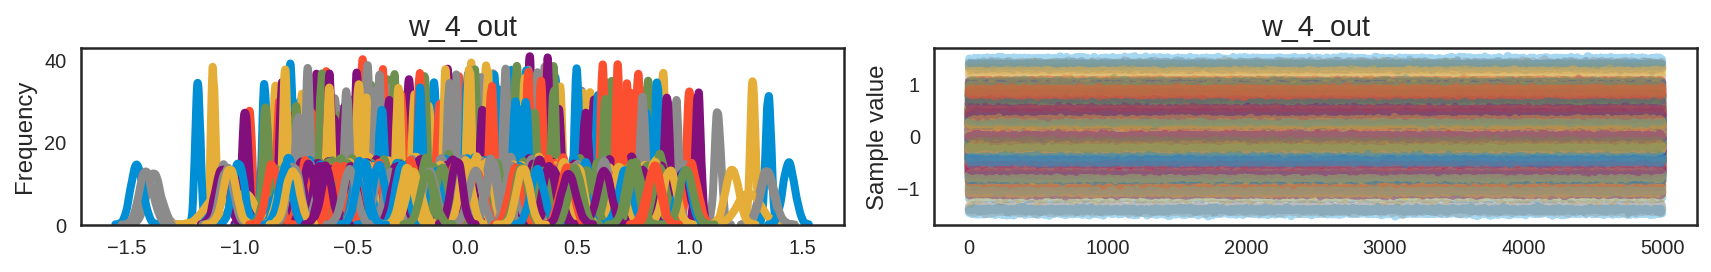

In [59]:
pm.traceplot(trace,varnames=['w_4_out']);

In [52]:
# Replace shared variables with testing set
ann_input.set_value(X_test_fromtrain.values)
ann_output.set_value(Y_test_1hot.values)

# Creater posterior predictive samples
ppc = pm.sample_ppc(trace, model=neural_network, samples=5000)

# Use probability of > 0.5 to assume prediction of class 1
pred = ppc['out'].mean(axis=0) > 0.5

100%|██████████| 5000/5000 [04:17<00:00, 19.38it/s]


In [60]:
with neural_network_minibatch:
    samp_ppc = pm.sample_ppc(trace, samples=5000)

100%|██████████| 5000/5000 [04:19<00:00, 19.29it/s]


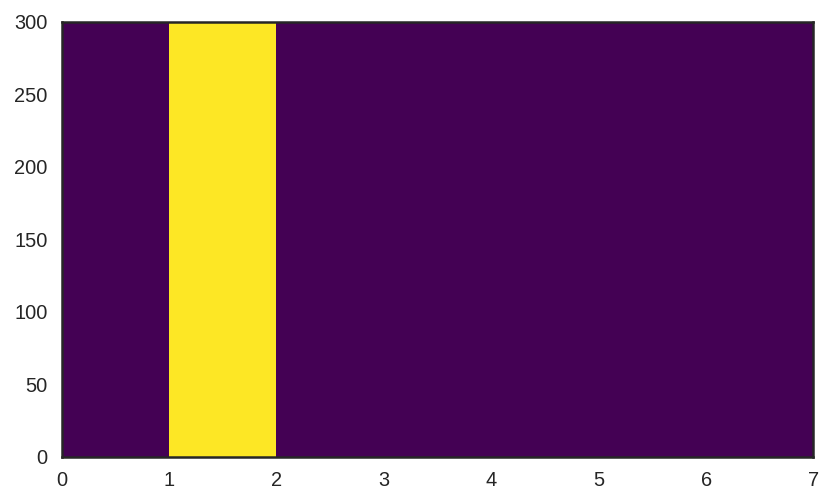

In [124]:
preds_proba = ppc['out'].mean(axis=0)
preds = (preds_proba == np.max(preds_proba, axis=1, keepdims=True)) * 1
plt.pcolor(preds,cmap=colormap)

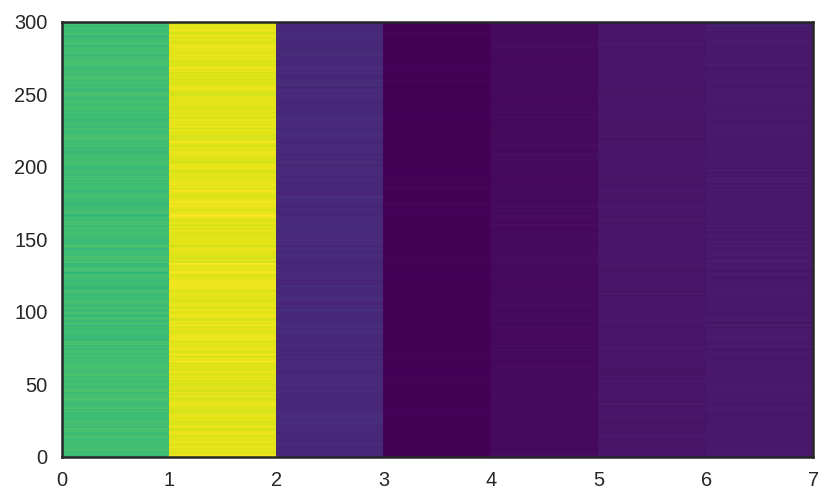

In [125]:
plt.pcolor(preds_proba,cmap=colormap)

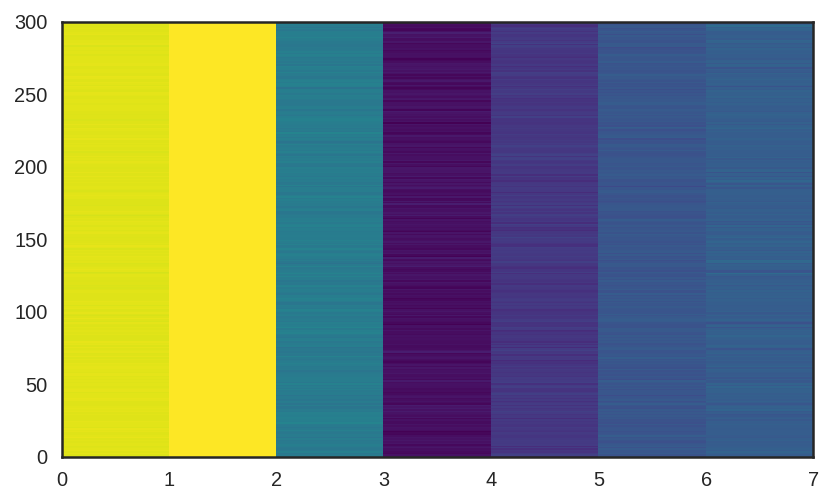

In [126]:
plt.pcolor(ppc['out'].std(axis=0),cmap=colormap)

In [67]:
Y_test_1hot.shape

(174304, 7)

In [69]:
preds_proba.shape

(300, 7)

In [70]:
from sklearn.metrics import classification_report

#print(classification_report(Y_test_1hot, preds))

# Downsampling the Input

In [72]:
X_train_f=train_df[features_imp]
X_test_f=test_df[features_imp]
Y_train=train_df[['Cover_Type']]
Y_test=test_df[['Cover_Type']]

In [73]:
X_full=pd.concat([X_train_f,X_test_f])
Y_full=pd.concat([Y_train,Y_test])

In [86]:
X_full.reset_index(inplace=True)
Y_full.reset_index(inplace=True)

In [87]:
X_full.shape,Y_full.shape

((581012, 64), (581012, 2))

In [88]:
X_full.drop(['index'],inplace=True,axis=1)
Y_full.drop(['index'],inplace=True,axis=1)

In [89]:
Y_full['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [90]:
Y_full_1hot=pd.get_dummies(Y_full,columns=['Cover_Type'])

In [91]:
Y_full_1hot.head()

,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [92]:
downsampled_targets = []

for i in range(1, 7+1):
    target = Y_full_1hot[Y_full_1hot['Cover_Type_{i}'.format(i=i)] == 1]
    # print(len(target))
    downsampled_targets.append(target.sample(2747))

In [93]:
Y_downsampled = pd.concat(downsampled_targets)
Y_downsamp = pm.floatX(Y_downsampled)

In [100]:
Y_downsamp.shape

(19229, 7)

In [105]:
Y_downsampled.index

Int64Index([434043, 416543, 557068, 281745, 527400, 461670, 214205, 511758,
            444797, 375112,
            ...
            494660, 293447,  53815, 427167, 108236, 355002, 228122,  23686,
            520786, 233166],
           dtype='int64', length=19229)

In [106]:
X_full=pm.floatX(X_full)
X_downsampled = X_full.loc[Y_downsampled.index]
X_downsamp = pm.floatX(X_downsampled)

In [142]:
X_downsamp.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4
434043,2746.0,350.0,13.0,60.0,2.0,1693.0,197.0,218.0,159.0,2059.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
416543,3262.0,316.0,18.0,330.0,70.0,514.0,169.0,222.0,192.0,342.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
557068,3250.0,256.0,15.0,212.0,29.0,3170.0,185.0,248.0,201.0,1209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
281745,3344.0,183.0,12.0,272.0,65.0,3727.0,223.0,248.0,156.0,1691.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
527400,3035.0,324.0,13.0,0.0,0.0,3081.0,187.0,226.0,179.0,2560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [109]:
def make_nn(ann_input, ann_output, n_hidden):
    """
    Makes a feed forward neural network with n_hidden layers for doing multi-
    class classification.
    
    Feed-forward networks are easy to define, so I have not relied on any 
    other Deep Learning frameworks to define the neural network here.
    """
    init_1 = np.random.randn(ann_input.shape[1], n_hidden)
    init_2 = np.random.randn(n_hidden, n_hidden)
    init_out = np.random.randn(n_hidden, ann_output.shape[1])
    
    with pm.Model() as nn_model:
        # Define weights
        weights_1 = pm.Normal('w_1', mu=0, sd=1, 
                              shape=(ann_input.shape[1], n_hidden),
                              testval=init_1)
        weights_2 = pm.Normal('w_2', mu=0, sd=1,
                              shape=(n_hidden, n_hidden),
                              testval=init_2)
        weights_out = pm.Normal('w_out', mu=0, sd=1, 
                                shape=(n_hidden, ann_output.shape[1]),
                                testval=init_out)

        # Define activations
        acts_1 = pm.Deterministic('activations_1', 
                                  tt.tanh(tt.dot(ann_input, weights_1)))
        acts_2 = pm.Deterministic('activations_2', 
                                  tt.tanh(tt.dot(acts_1, weights_2)))
        acts_out = pm.Deterministic('activations_out', 
                                    tt.nnet.softmax(tt.dot(acts_2, weights_out)))  # noqa
        
        # Define likelihood
        out = pm.Multinomial('likelihood', n=1, p=acts_out, 
                             observed=ann_output)
        
    return nn_model

In [110]:
model = make_nn(X_downsamp, Y_downsamp, n_hidden=20)

In [134]:
with model:
    # s = theano.shared(pm.floatX(1.1))
    # inference = pm.ADVI(cost_part_grad_scale=s)
    approx = pm.fit(300000, 
                    callbacks=[pm.callbacks.CheckParametersConvergence(tolerance=1e-1)])

Average Loss = 31,944: 100%|██████████| 300000/300000 [2:40:14<00:00, 31.20it/s]  
Finished [100%]: Average Loss = 31,942


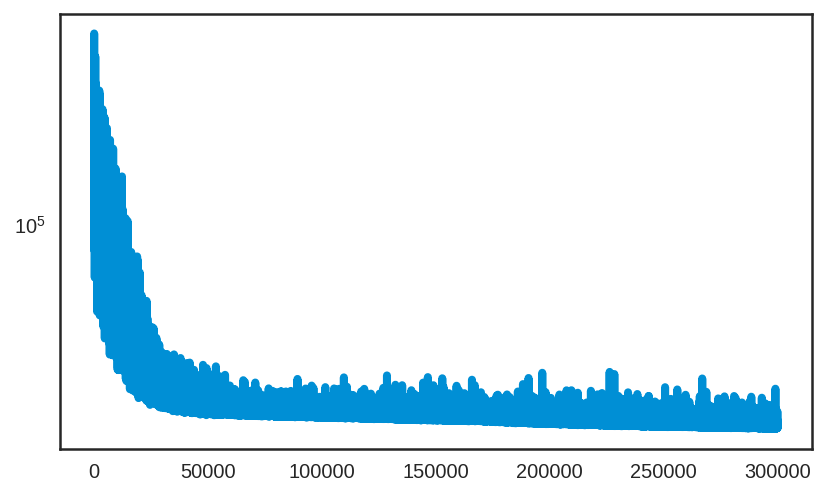

In [135]:
plt.plot(approx.hist)
plt.yscale('log')

In [136]:
with model:
    trace = approx.sample(5000)

In [137]:
with model:
    samp_ppc = pm.sample_ppc(trace, samples=5000)

100%|██████████| 5000/5000 [06:01<00:00, 13.82it/s]


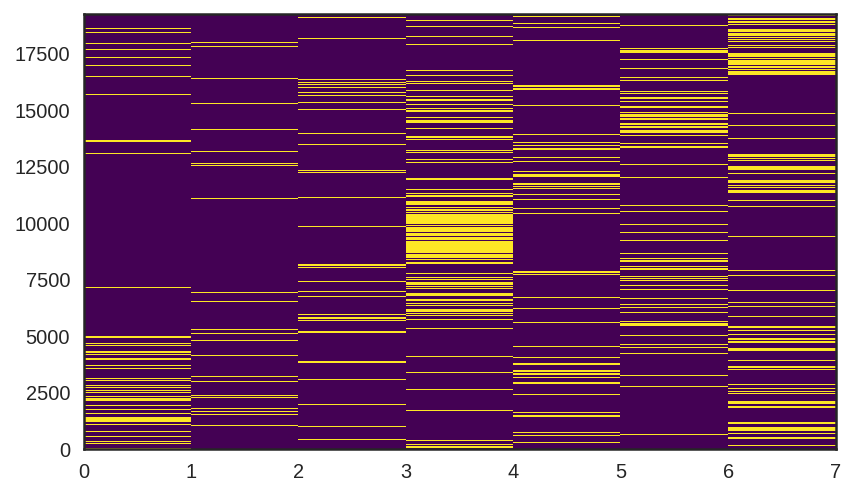

In [138]:
preds_proba = samp_ppc['likelihood'].mean(axis=0)
preds = (preds_proba == np.max(preds_proba, axis=1, keepdims=True)) * 1
plt.pcolor(preds,cmap=colormap)

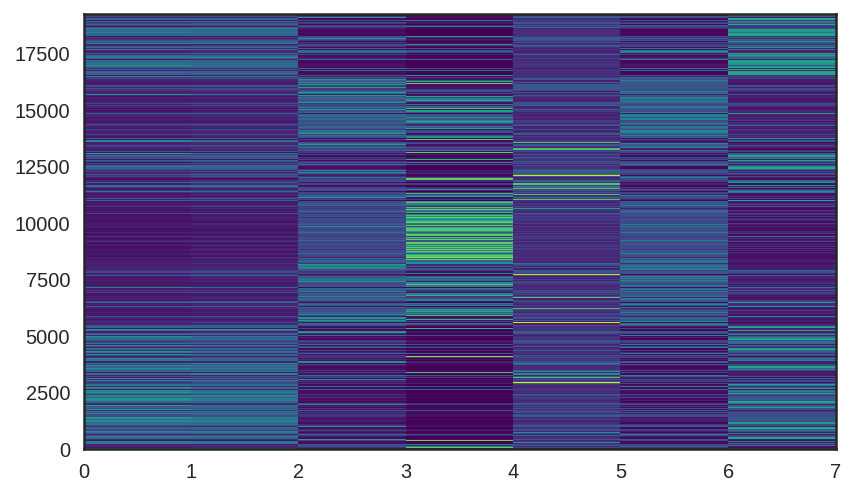

In [139]:
plt.pcolor(preds_proba,cmap=colormap)

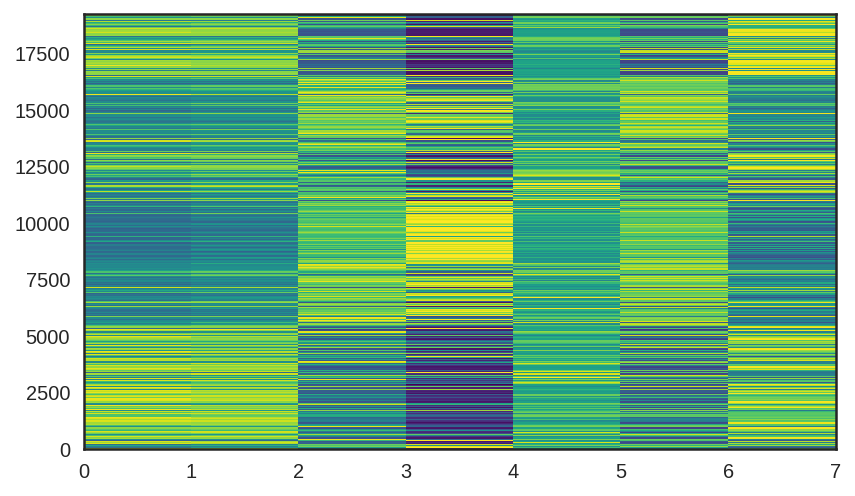

In [140]:
plt.pcolor(samp_ppc['likelihood'].std(axis=0),cmap=colormap)

In [141]:
from sklearn.metrics import classification_report

print(classification_report(Y_downsamp, preds))

             precision    recall  f1-score   support

          0       0.40      0.34      0.37      2747
          1       0.32      0.13      0.18      2747
          2       0.40      0.26      0.31      2747
          3       0.45      0.75      0.56      2747
          4       0.40      0.36      0.38      2747
          5       0.34      0.38      0.36      2747
          6       0.38      0.54      0.44      2747

avg / total       0.38      0.39      0.37     19229



In [148]:
ann_input = theano.shared(X_downsamp.values)
ann_output = theano.shared(Y_downsamp.values)
model = construct_nn(ann_input, ann_output)

In [151]:
#pm.Minibatch

pymc3.data.Minibatch

In [174]:
minibatch_x = pm.Minibatch(X_downsamp.values, batch_size=300)
minibatch_y = pm.Minibatch(Y_downsamp.values, batch_size=300)
neural_network_minibatch = construct_nn(minibatch_x, minibatch_y)
#with neural_network_minibatch:
#    approx = pm.fit(500000, method=pm.ADVI(),callbacks=[pm.callbacks.CheckParametersConvergence(diff='relative')])
with neural_network_minibatch:
    # s = theano.shared(pm.floatX(1.1))
    # inference = pm.ADVI(cost_part_grad_scale=s)
    approx = pm.fit(300000,callbacks=[pm.callbacks.CheckParametersConvergence(tolerance=1e-1)])
    trace = approx.sample(5000)
    samp_ppc = pm.sample_ppc(trace ,samples=5000)

Average Loss = 3.572e+05: 100%|██████████| 300000/300000 [7:53:44<00:00, 10.55it/s]   
Finished [100%]: Average Loss = 3.572e+05
100%|██████████| 5000/5000 [01:13<00:00, 67.98it/s]


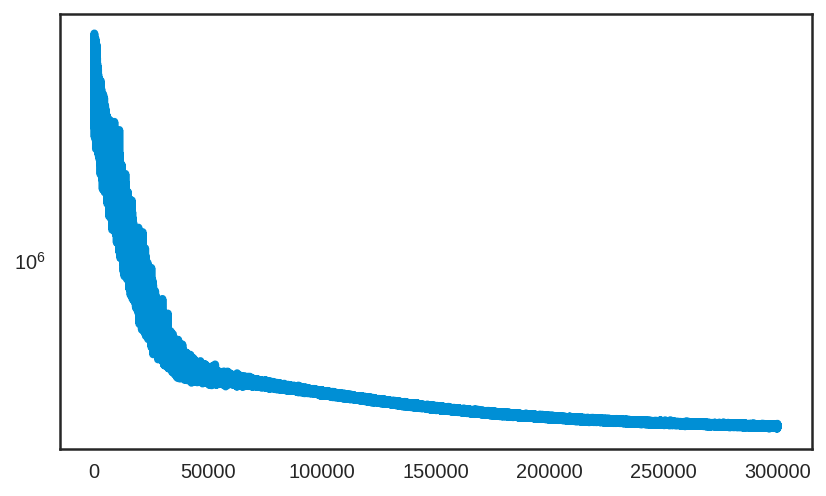

In [175]:
plt.plot(approx.hist)
plt.yscale('log')

In [155]:
#trace = approx.sample(5000)

In [169]:
neural_network_minibatch

In [172]:
#minibatch_x = pm.Minibatch(X_downsamp.values, batch_size=300)
#minibatch_y = pm.Minibatch(Y_downsamp.values, batch_size=300)
#neural_network_minibatch = construct_nn(minibatch_x, minibatch_y)
#with neural_network_minibatch:
    #samp_ppc = pm.sample_ppc(trace ,samples=5000)

100%|██████████| 5000/5000 [01:03<00:00, 78.80it/s]


In [178]:
preds_proba.shape

(300, 7)

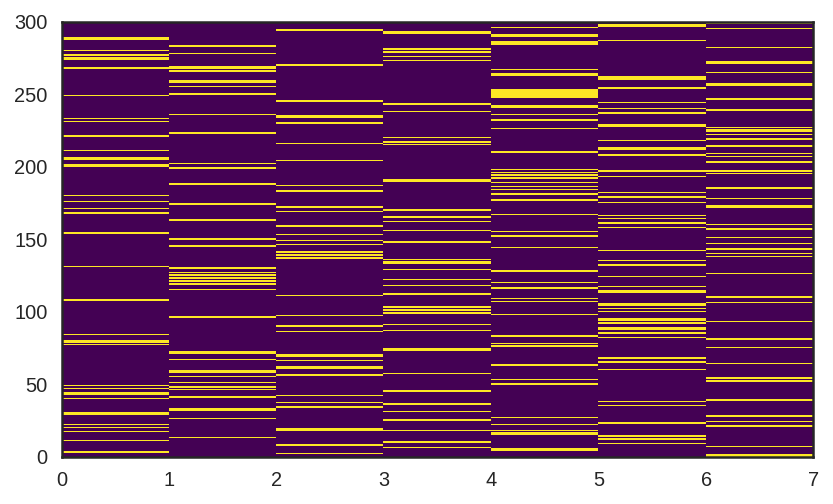

In [176]:
preds_proba = samp_ppc['out'].mean(axis=0)
preds = (preds_proba == np.max(preds_proba, axis=1, keepdims=True)) * 1
plt.pcolor(preds,cmap=colormap)

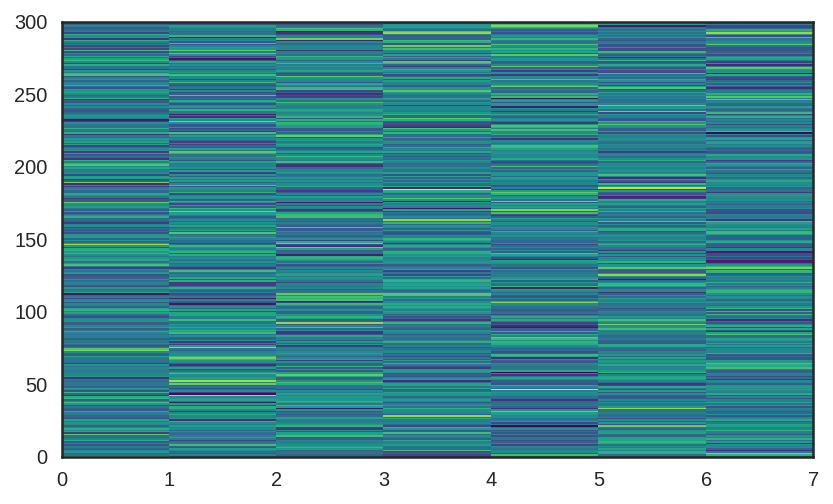

In [164]:
plt.pcolor(preds_proba,cmap=colormap)

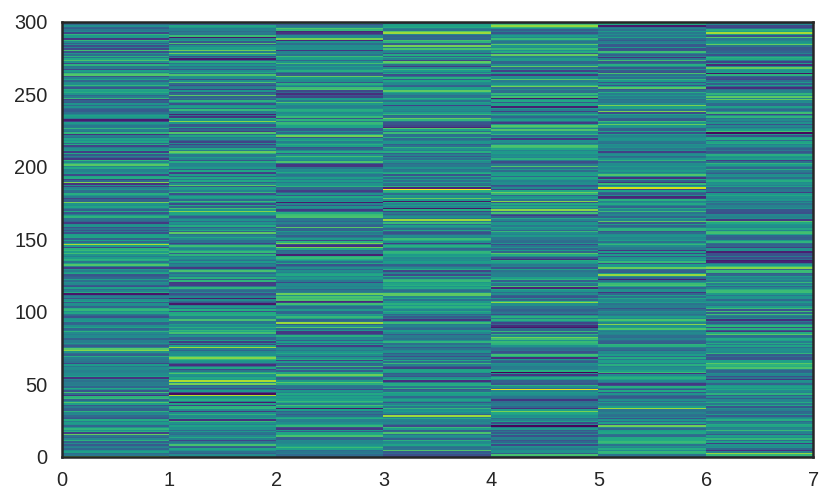

In [166]:
plt.pcolor(samp_ppc['out'].std(axis=0),cmap=colormap)

In [167]:
from sklearn.metrics import classification_report

print(classification_report(Y_downsamp, preds))

ValueError: Found input variables with inconsistent numbers of samples: [19229, 300]

# XGBoost

In [37]:
import xgboost as xgb

C:\Users\namanda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
X_train_r, X_valid,Y_train_r,Y_valid = train_test_split(X_train,Y_train, test_size=0.1, random_state=0,stratify=Y_train.Cover_Type)

In [39]:
model=xgb.XGBClassifier(n_estimators=1500,learning_rate=0.02,max_depth=7,objective='multi:softprob',nthread=-1,scale_pos_weight=1)

In [40]:
model.fit(X_train.values,Y_train.values.ravel(),eval_metric='mlogloss',eval_set=[(X_valid.values,Y_valid.values.ravel())],verbose=True,early_stopping_rounds=550)

[0]	validation_0-mlogloss:1.90497
Will train until validation_0-mlogloss hasn't improved in 550 rounds.
[1]	validation_0-mlogloss:1.8661
[2]	validation_0-mlogloss:1.82927
[3]	validation_0-mlogloss:1.79403
[4]	validation_0-mlogloss:1.76014
[5]	validation_0-mlogloss:1.72792
[6]	validation_0-mlogloss:1.69706
[7]	validation_0-mlogloss:1.66752
[8]	validation_0-mlogloss:1.63918
[9]	validation_0-mlogloss:1.61162
[10]	validation_0-mlogloss:1.58518
[11]	validation_0-mlogloss:1.55959
[12]	validation_0-mlogloss:1.53505
[13]	validation_0-mlogloss:1.51134
[14]	validation_0-mlogloss:1.48841
[15]	validation_0-mlogloss:1.46605
[16]	validation_0-mlogloss:1.44426
[17]	validation_0-mlogloss:1.42321
[18]	validation_0-mlogloss:1.40288
[19]	validation_0-mlogloss:1.38313
[20]	validation_0-mlogloss:1.36398
[21]	validation_0-mlogloss:1.34541
[22]	validation_0-mlogloss:1.32714
[23]	validation_0-mlogloss:1.30948
[24]	validation_0-mlogloss:1.29237
[25]	validation_0-mlogloss:1.27571
[26]	validation_0-mlogloss:1.25

[225]	validation_0-mlogloss:0.452674
[226]	validation_0-mlogloss:0.451838
[227]	validation_0-mlogloss:0.451011
[228]	validation_0-mlogloss:0.450276
[229]	validation_0-mlogloss:0.449505
[230]	validation_0-mlogloss:0.448825
[231]	validation_0-mlogloss:0.448011
[232]	validation_0-mlogloss:0.447222
[233]	validation_0-mlogloss:0.446491
[234]	validation_0-mlogloss:0.445745
[235]	validation_0-mlogloss:0.445023
[236]	validation_0-mlogloss:0.444384
[237]	validation_0-mlogloss:0.44359
[238]	validation_0-mlogloss:0.442812
[239]	validation_0-mlogloss:0.442149
[240]	validation_0-mlogloss:0.441462
[241]	validation_0-mlogloss:0.440785
[242]	validation_0-mlogloss:0.440054
[243]	validation_0-mlogloss:0.439116
[244]	validation_0-mlogloss:0.438516
[245]	validation_0-mlogloss:0.437899
[246]	validation_0-mlogloss:0.437071
[247]	validation_0-mlogloss:0.436451
[248]	validation_0-mlogloss:0.435677
[249]	validation_0-mlogloss:0.4351
[250]	validation_0-mlogloss:0.434301
[251]	validation_0-mlogloss:0.433511
[252

[448]	validation_0-mlogloss:0.359874
[449]	validation_0-mlogloss:0.359688
[450]	validation_0-mlogloss:0.3595
[451]	validation_0-mlogloss:0.35927
[452]	validation_0-mlogloss:0.359101
[453]	validation_0-mlogloss:0.358886
[454]	validation_0-mlogloss:0.358714
[455]	validation_0-mlogloss:0.35836
[456]	validation_0-mlogloss:0.358138
[457]	validation_0-mlogloss:0.357929
[458]	validation_0-mlogloss:0.357767
[459]	validation_0-mlogloss:0.357494
[460]	validation_0-mlogloss:0.357242
[461]	validation_0-mlogloss:0.357003
[462]	validation_0-mlogloss:0.356786
[463]	validation_0-mlogloss:0.356621
[464]	validation_0-mlogloss:0.35643
[465]	validation_0-mlogloss:0.356081
[466]	validation_0-mlogloss:0.355846
[467]	validation_0-mlogloss:0.355677
[468]	validation_0-mlogloss:0.35523
[469]	validation_0-mlogloss:0.354837
[470]	validation_0-mlogloss:0.354632
[471]	validation_0-mlogloss:0.354333
[472]	validation_0-mlogloss:0.354112
[473]	validation_0-mlogloss:0.353851
[474]	validation_0-mlogloss:0.353721
[475]	v

[671]	validation_0-mlogloss:0.312934
[672]	validation_0-mlogloss:0.312686
[673]	validation_0-mlogloss:0.312544
[674]	validation_0-mlogloss:0.312371
[675]	validation_0-mlogloss:0.312233
[676]	validation_0-mlogloss:0.312102
[677]	validation_0-mlogloss:0.311941
[678]	validation_0-mlogloss:0.311727
[679]	validation_0-mlogloss:0.311523
[680]	validation_0-mlogloss:0.311426
[681]	validation_0-mlogloss:0.31124
[682]	validation_0-mlogloss:0.311105
[683]	validation_0-mlogloss:0.310939
[684]	validation_0-mlogloss:0.310731
[685]	validation_0-mlogloss:0.310559
[686]	validation_0-mlogloss:0.310391
[687]	validation_0-mlogloss:0.310246
[688]	validation_0-mlogloss:0.310073
[689]	validation_0-mlogloss:0.309925
[690]	validation_0-mlogloss:0.309712
[691]	validation_0-mlogloss:0.309497
[692]	validation_0-mlogloss:0.309375
[693]	validation_0-mlogloss:0.309234
[694]	validation_0-mlogloss:0.30906
[695]	validation_0-mlogloss:0.308891
[696]	validation_0-mlogloss:0.308767
[697]	validation_0-mlogloss:0.30864
[698

[894]	validation_0-mlogloss:0.278719
[895]	validation_0-mlogloss:0.278601
[896]	validation_0-mlogloss:0.278412
[897]	validation_0-mlogloss:0.278254
[898]	validation_0-mlogloss:0.278117
[899]	validation_0-mlogloss:0.27799
[900]	validation_0-mlogloss:0.277842
[901]	validation_0-mlogloss:0.277762
[902]	validation_0-mlogloss:0.277513
[903]	validation_0-mlogloss:0.277351
[904]	validation_0-mlogloss:0.277073
[905]	validation_0-mlogloss:0.2769
[906]	validation_0-mlogloss:0.276548
[907]	validation_0-mlogloss:0.276379
[908]	validation_0-mlogloss:0.276141
[909]	validation_0-mlogloss:0.275899
[910]	validation_0-mlogloss:0.275772
[911]	validation_0-mlogloss:0.275488
[912]	validation_0-mlogloss:0.275328
[913]	validation_0-mlogloss:0.275184
[914]	validation_0-mlogloss:0.275003
[915]	validation_0-mlogloss:0.274719
[916]	validation_0-mlogloss:0.274584
[917]	validation_0-mlogloss:0.274375
[918]	validation_0-mlogloss:0.274199
[919]	validation_0-mlogloss:0.274052
[920]	validation_0-mlogloss:0.273925
[921

[1113]	validation_0-mlogloss:0.245838
[1114]	validation_0-mlogloss:0.245743
[1115]	validation_0-mlogloss:0.245612
[1116]	validation_0-mlogloss:0.245465
[1117]	validation_0-mlogloss:0.245331
[1118]	validation_0-mlogloss:0.245188
[1119]	validation_0-mlogloss:0.24501
[1120]	validation_0-mlogloss:0.24482
[1121]	validation_0-mlogloss:0.244697
[1122]	validation_0-mlogloss:0.244629
[1123]	validation_0-mlogloss:0.244385
[1124]	validation_0-mlogloss:0.244247
[1125]	validation_0-mlogloss:0.244097
[1126]	validation_0-mlogloss:0.244026
[1127]	validation_0-mlogloss:0.243873
[1128]	validation_0-mlogloss:0.243735
[1129]	validation_0-mlogloss:0.24366
[1130]	validation_0-mlogloss:0.243583
[1131]	validation_0-mlogloss:0.243435
[1132]	validation_0-mlogloss:0.243309
[1133]	validation_0-mlogloss:0.243164
[1134]	validation_0-mlogloss:0.243014
[1135]	validation_0-mlogloss:0.242858
[1136]	validation_0-mlogloss:0.242768
[1137]	validation_0-mlogloss:0.242609
[1138]	validation_0-mlogloss:0.242498
[1139]	validati

[1330]	validation_0-mlogloss:0.219636
[1331]	validation_0-mlogloss:0.219541
[1332]	validation_0-mlogloss:0.219474
[1333]	validation_0-mlogloss:0.219362
[1334]	validation_0-mlogloss:0.219317
[1335]	validation_0-mlogloss:0.219236
[1336]	validation_0-mlogloss:0.219139
[1337]	validation_0-mlogloss:0.219043
[1338]	validation_0-mlogloss:0.218976
[1339]	validation_0-mlogloss:0.218916
[1340]	validation_0-mlogloss:0.218844
[1341]	validation_0-mlogloss:0.21877
[1342]	validation_0-mlogloss:0.218701
[1343]	validation_0-mlogloss:0.218602
[1344]	validation_0-mlogloss:0.218432
[1345]	validation_0-mlogloss:0.218334
[1346]	validation_0-mlogloss:0.21823
[1347]	validation_0-mlogloss:0.218152
[1348]	validation_0-mlogloss:0.217961
[1349]	validation_0-mlogloss:0.217824
[1350]	validation_0-mlogloss:0.217706
[1351]	validation_0-mlogloss:0.217531
[1352]	validation_0-mlogloss:0.217384
[1353]	validation_0-mlogloss:0.217296
[1354]	validation_0-mlogloss:0.217146
[1355]	validation_0-mlogloss:0.217078
[1356]	validat

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=1500, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [41]:
pred=model.predict(X_test.values)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(pred,Y_test.values)

0.90939713652759102

In [44]:
model.feature_importances_

array([  6.14868850e-02,   4.18594517e-02,   2.43231319e-02,
         2.21966729e-02,   2.99062543e-02,   3.99525203e-02,
         3.80697772e-02,   3.74074690e-02,   3.07211168e-02,
         4.76472192e-02,   9.76739153e-02,   3.43117267e-02,
         2.64700577e-02,   5.52749410e-02,   4.76230346e-02,
         4.61942330e-02,   5.81083633e-02,   8.10417607e-02,
         7.67162815e-02,   1.43624435e-03,   4.17478289e-03,
         2.20087706e-03,   5.08080749e-03,   1.47903396e-03,
         2.21948116e-03,   2.60458819e-05,   7.06959618e-05,
         5.45103103e-04,   5.41940378e-03,   3.25573515e-03,
         1.89948897e-03,   4.30129142e-03,   8.33468221e-04,
         0.00000000e+00,   1.63344888e-03,   3.04178684e-03,
         1.28368993e-04,   5.76730235e-04,   2.04832247e-03,
         5.37661428e-04,   2.31622299e-03,   4.09850571e-03,
         3.90874268e-03,   1.17206466e-04,   7.33005523e-04,
         7.68353522e-04,   1.23717939e-03,   3.89758009e-03,
         2.70133000e-03,

In [45]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

x_cols=list(X_train.columns)
# Print the feature ranking
print("Feature ranking:")

for f in range(52):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print("%d. feature %s : %f" % (f + 1, x_cols[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Ele_minus_VDtHyd : 0.097674
2. feature Fire_plus_Road : 0.081042
3. feature Fire_minus_Road : 0.076716
4. feature Elevation : 0.061487
5. feature Hydro_minus_Road : 0.058108
6. feature Hydro_plus_Fire : 0.055275
7. feature Horizontal_Distance_To_Fire_Points : 0.047647
8. feature Hydro_minus_Fire : 0.047623
9. feature Hydro_plus_Road : 0.046194
10. feature Aspect : 0.041859
11. feature Horizontal_Distance_To_Roadways : 0.039953
12. feature Hillshade_9am : 0.038070
13. feature Hillshade_Noon : 0.037407
14. feature Ele_plus_VDtHyd : 0.034312
15. feature Hillshade_3pm : 0.030721
16. feature Vertical_Distance_To_Hydrology : 0.029906
17. feature Distanse_to_Hydrology : 0.026470
18. feature Slope : 0.024323
19. feature Horizontal_Distance_To_Hydrology : 0.022197
20. feature Wilderness_Area_1 : 0.008076
21. feature Wilderness_Area_3 : 0.007680
22. feature Soil_Type_10 : 0.005419
23. feature Soil_Type_4 : 0.005081
24. feature Soil_Type_33 : 0.004519
25. feature Soil_

In [46]:
from sklearn.feature_selection import SelectFromModel
model1 = SelectFromModel(model, prefit=True)
X_train_red_rf_features = model1.transform(X_train)
idxs_selected_sfm = model1.get_support(indices=True)
print(X_train_red_rf_features.shape)

(174303, 19)


In [47]:
idxs_selected_sfm

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64)

In [48]:
X_test_red_rf_features = model1.transform(X_test)

In [49]:
X_test_red_rf_features.shape

(406709, 19)

In [56]:
from sklearn.feature_selection import SelectKBest # use this later
from sklearn.feature_selection import mutual_info_classif

# Weka Run

In [39]:
import weka.core.jvm as jvm

In [40]:
jvm.start(packages=True,class_path=['C:\\Program Files\\Weka-3-8\\weka.jar','C:\\Program Files\\Weka-3-8\\weka-src.jar'])

DEBUG:weka.core.jvm:Adding user-supplied classpath=C:\Program Files\Weka-3-8\weka.jar
DEBUG:weka.core.jvm:Adding user-supplied classpath=C:\Program Files\Weka-3-8\weka-src.jar
DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Adding Weka packages
ERROR:weka.core.jvm:package_dir not found: H:\\wekafiles\packages
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\namanda\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\namanda\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\namanda\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Program Files\\Weka-3-8\\weka.jar', 'C:\\Program Files\\Weka-3-8\\weka-src.jar', 'C:\\Users\\namanda\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.j

In [41]:
from weka.classifiers import Classifier

In [59]:
from weka.classifiers import Classifier
from weka.core.classes import from_commandline

cmdline='weka.classifiers.meta.LogitBoost -P 100 -L -1.7976931348623157E308 -H 1.0 -Z 3.0 -O 1 -E 1 -S 1 -I 10 -W weka.classifiers.trees.RandomForest -- -P 100 -I 100 -num-slots 4 -K 0 -M 1.0 -V 0.001 -S 1'

classifier = from_commandline(cmdline, classname="weka.classifiers.Classifier")
#cls = Classifier(classname="weka.classifiers.meta.LogitBoost",options=["-W","weka.classifiers.trees.RandomForest", "-O","4"])

In [60]:
classifier.to_commandline()

'weka.classifiers.meta.LogitBoost -P 100 -L -1.7976931348623157E308 -H 1.0 -Z 3.0 -O 1 -E 1 -S 1 -I 10 -W weka.classifiers.trees.RandomForest -- -P 100 -I 100 -num-slots 4 -K 0 -M 1.0 -V 0.001 -S 1'

In [61]:
print(cls.to_help())

weka.classifiers.meta.LogitBoost

DESCRIPTION

Class for performing additive logistic regression. 
This class performs classification using a regression scheme as the base learner, and can handle multi-class problems.  For more information, see

J. Friedman, T. Hastie, R. Tibshirani (1998). Additive Logistic Regression: a Statistical View of Boosting. Stanford University.

OPTIONS

-Q
	Use resampling instead of reweighting for boosting.

-use-estimated-priors
	Use estimated priors rather than uniform ones.

-P <percent>
	Percentage of weight mass to base training on.
	(default 100, reduce to around 90 speed up)

-L <num>
	Threshold on the improvement of the likelihood.
	(default -Double.MAX_VALUE)

-H <num>
	Shrinkage parameter.
	(default 1)

-Z <num>
	Z max threshold for responses.
	(default 3)

-O <int>
	The size of the thread pool, for example, the number of cores in the CPU. (default 1)

-E <int>
	The number of threads to use for batch prediction, which should be >= size of thread 

In [62]:
X_train_df=pd.DataFrame(X_train,columns=features_imp)

In [63]:
Y_train_df=pd.DataFrame(Y_train,columns=['Cover_Type'])
train_df=pd.concat([X_train_df, Y_train_df], axis=1)

In [64]:
train_df.reset_index(inplace=True)

In [65]:
train_df.set_index('index',inplace=True)

In [66]:
train_df.to_csv('Train_file.csv',sep=',',index=False)

In [67]:
import weka.core.converters as converters
from weka.core.converters import Loader
#helper.print_title("Loading CSV file") 
loader = Loader(classname="weka.core.converters.CSVLoader") 
data = loader.load_file("Train_file.csv") 
#print(str(data)) 
#converters.load_any_file("creditcard.csv")

In [343]:
#data.delete_first_attribute()

In [68]:
from weka.filters import Filter
nominal = Filter(classname="weka.filters.unsupervised.attribute.NumericToNominal", options=["-R", "last"])
#print(nominal.to_help())

In [69]:
nominal.inputformat(data)
nominaldata1 = nominal.filter(data)
nominaldata1.class_is_last()

In [70]:
#print(cls)

In [71]:
cls.build_classifier(nominaldata1)

JavaException: GC overhead limit exceeded

In [64]:
for index, inst in enumerate(data):
    pred = cls.classify_instance(inst)
    dist = cls.distribution_for_instance(inst)
    print(str(index+1) + ": label index=" + str(pred) + ", class distribution=" + str(dist))

1: label index=0.0, class distribution=[ 1.  0.  0.]
2: label index=0.0, class distribution=[ 1.  0.  0.]
3: label index=0.0, class distribution=[ 1.  0.  0.]
4: label index=0.0, class distribution=[ 1.  0.  0.]
5: label index=0.0, class distribution=[ 1.  0.  0.]
6: label index=0.0, class distribution=[ 1.  0.  0.]
7: label index=0.0, class distribution=[ 1.  0.  0.]
8: label index=0.0, class distribution=[ 1.  0.  0.]
9: label index=0.0, class distribution=[ 1.  0.  0.]
10: label index=0.0, class distribution=[ 1.  0.  0.]
11: label index=0.0, class distribution=[ 1.  0.  0.]
12: label index=0.0, class distribution=[ 1.  0.  0.]
13: label index=0.0, class distribution=[ 1.  0.  0.]
14: label index=0.0, class distribution=[ 1.  0.  0.]
15: label index=0.0, class distribution=[ 1.  0.  0.]
16: label index=0.0, class distribution=[ 1.  0.  0.]
17: label index=0.0, class distribution=[ 1.  0.  0.]
18: label index=0.0, class distribution=[ 1.  0.  0.]
19: label index=0.0, class distributi

In [66]:
#from weka.classifiers import Classifier
#cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
#cls.build_classifier(data)

#print(cls)

import weka.plot.graph as graph  # NB: pygraphviz and PIL are required
graph.plot_dot_graph(cls.graph)

ERROR:weka.plot.graph:Pygraphviz is not installed, cannot generate graph plot!


J48 pruned tree
------------------

petalwidth <= 0.6: Iris-setosa (50.0)
petalwidth > 0.6
|   petalwidth <= 1.7
|   |   petallength <= 4.9: Iris-versicolor (48.0/1.0)
|   |   petallength > 4.9
|   |   |   petalwidth <= 1.5: Iris-virginica (3.0)
|   |   |   petalwidth > 1.5: Iris-versicolor (3.0/1.0)
|   petalwidth > 1.7: Iris-virginica (46.0/1.0)

Number of Leaves  : 	5

Size of the tree : 	9



In [67]:
jvm.stop()